<small><i>May 2014 - This notebook was created by [Oriol Pujol Vila](http://www.maia.ub.es/~oriol). Source and license info are in the folder.</i></small>

# Machine Learning: Unsupervised learning

CONTENTS:

0. Introduction to unsupervised learning

1. K-means

2. Hierarchical clustering

3. Density-based clustering

4. Spectral clustering


In [1]:
%matplotlib inline

# 1. Introduction to unsupervised learning

Unsupervised learning is defined as the set of algorithms which learn from a training set of unlableled or unannotated examples, using the features of the inputs to categorize inputs together according to some statistical/geometic criteria. This is oposed to supervised learning where a classification of examples is given. 

Different kinds of unsupervised learning problems:

+ Clustering: partition examples into groups when no pre-defined categories/classes are available
+ Novelty detection: find changes in data
+ Outlier detection: find unusual events (e.g. malfunction)

The most common unsupervised task is clustering. In this notebook we will focus on this task.

# 2. Clustering

Partition unlabeled examples into disjoint subsets of clusters, such that:

+ Examples within a cluster are similar (high intra-class similarity)
+ Examples in different clusters are different (low inter-class similarity)

It can help in discovering new categories in an unsupervised manner (no sample category labels provided).

This task has many application in different domains:

+ Group genes that perform the same function
+ Group individuals that has similar political view
+ Categorize documents of similar topics
+ Market segmentation/ building customer profiles for market analysis
+ Social network analysis
+ Astronomical data analysis
+ Compression 
+ Detection of near duplicates
+ Grouping related stock quotes for investment portfolio management
+ Building a code book of prototype samples for supervised learning algorithms

### Important questions in clustering

+ What is a natural grouping among these objects? 
    + Definition of "groupness"
    + What makes objects “related”? 
    + Definition of "similarity/distance"
+ Representation for objects 
    + Vector space? Normalization?
+ How many clusters?
    + Fixed a priori?
    + Completely data driven?
    + Avoid “trivial” clusters - too large or small

<div class="alert alert-info"> **IMPORTANT IDEA: ** Clustering is subjective
</div>

Clustering will help us to analyze and get insight of the data but the quality of the partition depends on the application and the analyst.

### Similarity and distance.

The notion of similarity is a tough one, however we can use the notion of distance as a surrogate.

The most wide spread distance metric is Minkowski:

$$d(a,b) = \big(\sum\limits_{i=1}^d |a_i-b_i|^p \big)^{1/p}$$

The most well known instantiations of this metric are: 

+ $p = 2$ we have Euclidean distance, 
+ $p=1$ Manhattan distance, and 
+ $p=\infty$ max-distance

### Clustering techniques

There are two big families of clustering techniques:

+ Partitional algorithms: Start with a random partititon and refine iteratively
+ Hierarchical algorithms: Agglomerative (bottom-up), top-down

## 2.1 Partitional algorithms:

Partitional algorithms can be divided in two branches:

+ Hard partition algorithms, such as K-means, assign a unique cluster value to each element in the feature space.
+ Soft partition algorithms, such as mixture of gaussians, can be viewed as density estimators and assign a confidence or probability to each point in the space.

In order to build our intuition about clustering, we will start with the simplest of the methods, K-means.

### 2.1.1 K-means algorithm
1. Initialize the value  $K$.
2. Initialize the $K$ cluster centers, e.g. randomly.
3. Decide the class memberships of the N data samples by assigning them to the nearest cluster centroids (e.g. the center of gravity or mean)
4. Re-estimate the $K$ cluster centers, by assuming the memberships found above are correct.
5. If none of the N objects changed membership in the last iteration, exit. Otherwise go to 3.

Let us see, this in action:

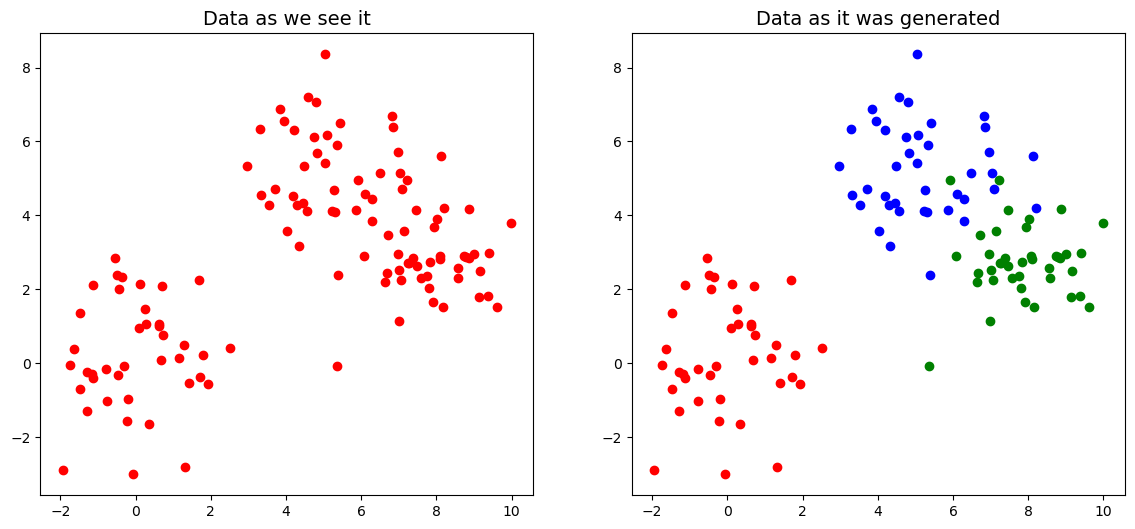

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#Create some data
MAXN=40
X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
X = np.concatenate([X,[8,3]+1*np.random.randn(MAXN,2)])

#Just for visualization purposes
y = np.concatenate([np.ones((MAXN,1)),2*np.ones((MAXN,1))])
y = np.concatenate([y,3*np.ones((MAXN,1))])

plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],color='r')
plt.title('Data as we see it', size=14)

plt.subplot(1,2,2)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
plt.title('Data as it was generated',size=14)
fig=plt.gcf()
fig.set_size_inches((14,6))

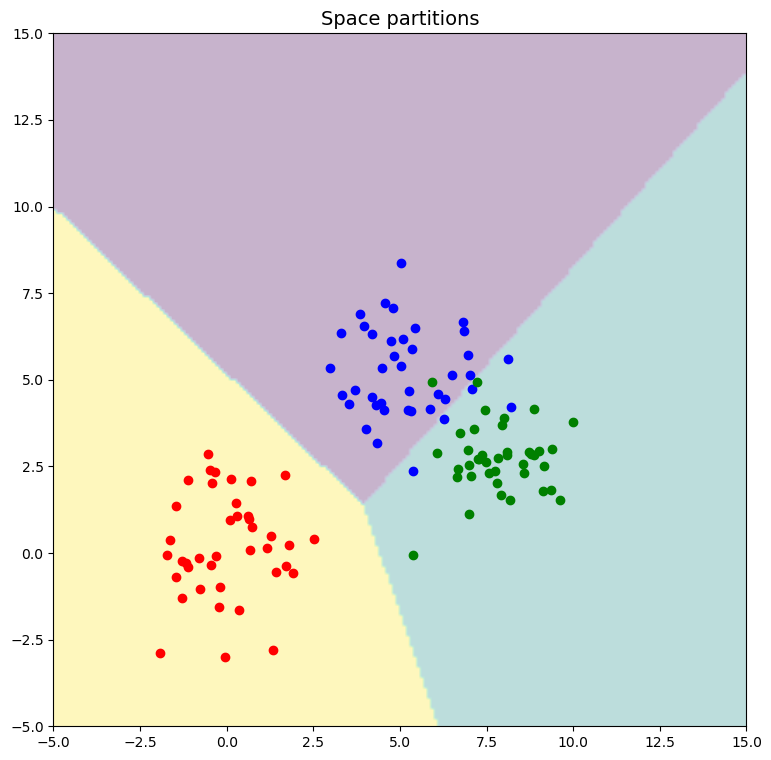

In [3]:
from sklearn import cluster

K=3
clf = cluster.KMeans(init='random', n_clusters=K, random_state=0)
clf.fit(X)

plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')

x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]

Z=clf.predict(data)
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)
plt.title('Space partitions', size=14)
fig = plt.gcf()
fig.set_size_inches((9,9))

Hand-made step by step analysis:

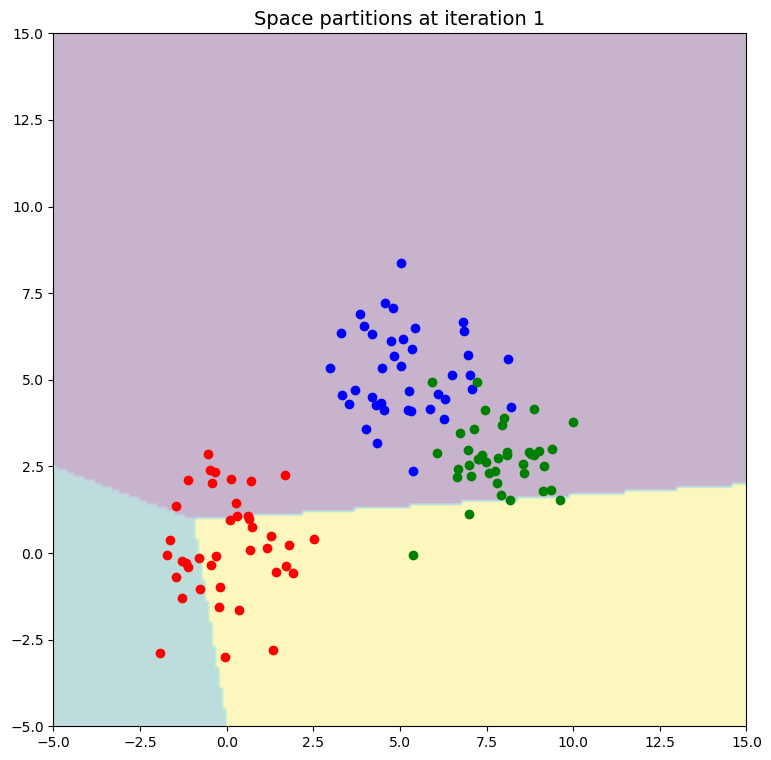

In [4]:
from sklearn import cluster
from scipy.spatial.distance import cdist
K=3

#Select the three centroids: the first three elements of the data
C=X[:3,:]

plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
plt.scatter(C[:,0],C[:,1],s=120, 
           facecolors='none', 
           linewidths=2,
           zorder=10)

x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]
Y = cdist(data, C, 'euclidean')
Z = np.argmin(Y,axis=1)
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)
plt.title('Space partitions at iteration 1', size=14)
fig = plt.gcf()
fig.set_size_inches((9,9))

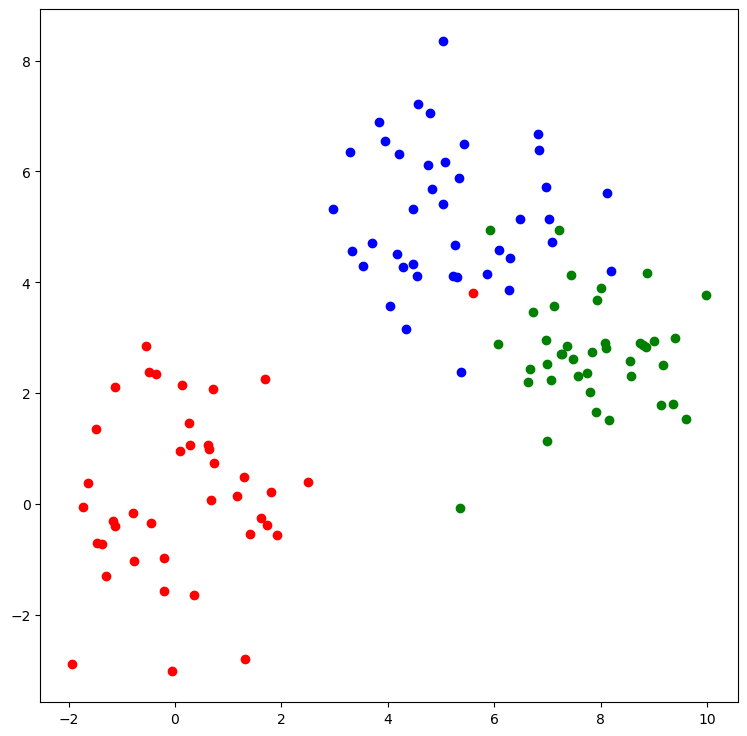

In [5]:
#Compute membership for next iteration
Y = cdist(X, C, 'euclidean')
y_pred = np.argmin(Y,axis=1)

#Update centroids
for i in range(K):
    C[i,:]=np.mean(X[y_pred==i,:],axis=0)

plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
plt.scatter(C[:,0],C[:,1],s=120, 
           facecolors='none', 
           linewidths=2,
           zorder=10)
fig = plt.gcf()
fig.set_size_inches((9,9))

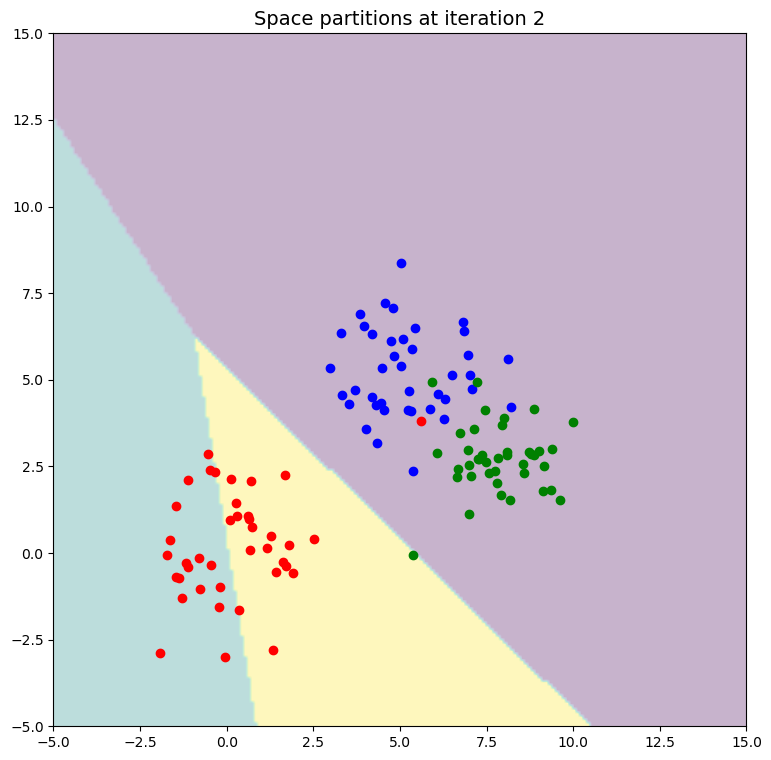

In [6]:
#And the new area of influence
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
plt.scatter(C[:,0],C[:,1],s=120, 
           facecolors='none', 
           linewidths=2,
           zorder=10)
x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]
Y = cdist(data, C, 'euclidean')
Z = np.argmin(Y,axis=1)
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)
plt.title('Space partitions at iteration 2', size=14)
fig = plt.gcf()
fig.set_size_inches((9,9))

 This process is repeated until the centroid stabilize.
 
 Some seeds can result in poor convergence rate, or convergence to sub-optimal clusterings:
 
 + Select good seeds using a heuristic (e.g. seeds with large distance among them)
 + Try out multiple starting points 
 + Initialize with the results of another method.

# CASE STUDY: EUROSTAT data analysis

Eurostat is the home of the European Comission data. Eurostat’s main role is to process and publish comparable statistical information at European level. Data in eurostat is provided by each member state. Eurostat's re-use policy is free re-use of its data, both for non-commercial and commercial purposes (with some minor exceptions).

<img src = 'images/EuroStat.png' />


In this case study we are going to retrieve Eurostat data and test clustering algorithms on it. The amount of data in the database is huge, thus we are going to use a small subset for illustration purposes. In our first study we are going to focus on **indicators on education finance data** among the member states. The data is already downloaded and provided as is in the file `educ_figdp_1_Data.csv`. You can download it directly following this links `Database by terms>Population and social conditions>Education and training>Indicators on education finance`. 

Let us start having a look a the data.

In [7]:
%reset -f
#Read and check the dataset downloaded from the EuroStat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
edu=pd.read_csv('educ_figdp_1_Data.csv',na_values=':')
edu.head()

,TIME,GEO,INDIC_ED,Value
0,2002,European Union (27 countries),Total public expenditure on education as % of ...,5.10
1,2002,European Union (27 countries),Total public expenditure on education as % of ...,1.14
2,2002,European Union (27 countries),Total public expenditure on education as % of ...,2.32
3,2002,European Union (27 countries),Total public expenditure on education as % of ...,1.15
4,2002,European Union (27 countries),Total public expenditure on education as % of ...,0.50


In [8]:
edu.tail()

,TIME,GEO,INDIC_ED,Value
4915,2011,Japan,Total public expenditure on education as % of ...,NaN
4916,2011,Japan,Expenditure on educational institutions from p...,NaN
4917,2011,Japan,Public subsidies to the private sector as % of...,NaN
4918,2011,Japan,Expenditure on educational institutions from p...,1.56
4919,2011,Japan,Total public expenditure on education as % of ...,3.67


In [9]:
np.unique(edu['INDIC_ED'])

array(['Expenditure on educational institutions from private sources as % of GDP, for all levels of education combined',
       'Expenditure on educational institutions from public sources as % of GDP, for all levels of government combined',
       'Expenditure on educational institutions from public sources as % of total public expenditure, for all levels of education combined',
       'Public subsidies to the private sector as % of GDP, for all levels of education combined',
       'Public subsidies to the private sector as % of total public expenditure, for all levels of education combined',
       'Total public expenditure on education as % of GDP, at pre-primary level of education (ISCED 0) and not allocated by level',
       'Total public expenditure on education as % of GDP, at primary level of education (ISCED 1)',
       'Total public expenditure on education as % of GDP, at secondary level of education (ISCED 2-4)',
       'Total public expenditure on education as % of GDP, a

Data in CSV and databases are often organized in what is called *stacked* or *record* formats. In our case for each year (`TIME`) and country (`GEO`) of the EU as well as some reference countries such as Japan and United States we have twelve indicators (`INDIC_ED`) on education finance with their values (`Value`). Let us reshape the table into a feature vector style data set. To the process of reshaping stacked data into a table is sometimes called **pivoting**.

In [10]:
#Pivot table in order to get a nice feature vector representation with dual indexing by TIME and GEO 
pivedu=pd.pivot_table(edu, values='Value', index=['TIME', 'GEO'], columns=['INDIC_ED'])
pivedu.head()

INDIC_ED       Expenditure on educational institutions from private sources as % of GDP, for all levels of education combined  \
TIME GEO                                                                                                                        
2002 Austria                                                0.38                                                                
     Belgium                                                0.36                                                                
     Bulgaria                                               0.67                                                                
     Croatia                                                0.13                                                                
     Cyprus                                                 1.41                                                                

INDIC_ED       Expenditure on educational institutions from public sources as % of GDP, for all levels of government combined  \
TIME GEO                                                                                                                        
2002 Austria                                                5.30                                                                
     Belgium                                                5.80                                                                
     Bulgaria                                               3.75                                                                
     Croatia                                                3.71                                                                
     Cyprus                                                 5.87                                                                

INDIC_ED       Expenditure on educational institutions from public sources as % of total public expenditure, for all levels of education combined  \
TIME GEO                                                                                                                                            
2002 Austria                                               10.46                                                                                    
     Belgium                                               11.65                                                                                    
     Bulgaria                                               9.49                                                                                    
     Croatia                                                 NaN                                                                                    
     Cyprus                                                14.67                                                                                    

INDIC_ED       Public subsidies to the private sector as % of GDP, for all levels of education combined  \
TIME GEO                                                                                                  
2002 Austria                                                0.37                                          
     Belgium                                                0.29                                          
     Bulgaria                                               0.18                                          
     Croatia                                                 NaN                                          
     Cyprus                                                 0.73                                          

INDIC_ED       Public subsidies to the private sector as % of total public expenditure, for all levels of education combined  \
TIME GEO                                                                                                                       
2002 Austria                                                0.74                                                               
     Belgium  

In [11]:
print('Let us check the two indices:\n')
print('\nPrimary index (TIME): \n' + str(pivedu.index.levels[0].tolist()))
print('\nSecondary index (GEO): \n' + str(pivedu.index.levels[1].tolist()))

Let us check the two indices:


Primary index (TIME): 
[2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]

Secondary index (GEO): 
['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Euro area (13 countries)', 'Euro area (15 countries)', 'European Union (25 countries)', 'European Union (27 countries)', 'Finland', 'Former Yugoslav Republic of Macedonia, the', 'France', 'Germany (until 1990 former territory of the FRG)', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'United States']


Observe that we have ten year information on these indicators, and as expected we have all members of the European Union with some aggregates and control/reference countries. For the sake of simplicity let us focus on values on 2010 data.

In [12]:
#Extract 2010 set of valuesç
edu2010=pivedu.loc[2010]
edu2010.head()


INDIC_ED,"Expenditure on educational institutions from private sources as % of GDP, for all levels of education combined","Expenditure on educational institutions from public sources as % of GDP, for all levels of government combined","Expenditure on educational institutions from public sources as % of total public expenditure, for all levels of education combined","Public subsidies to the private sector as % of GDP, for all levels of education combined","Public subsidies to the private sector as % of total public expenditure, for all levels of education combined","Total public expenditure on education as % of GDP, at pre-primary level of education (ISCED 0) and not allocated by level","Total public expenditure on education as % of GDP, at primary level of education (ISCED 1)","Total public expenditure on education as % of GDP, at secondary level of education (ISCED 2-4)","Total public expenditure on education as % of GDP, at tertiary level of education (ISCED 5-6)","Total public expenditure on education as % of GDP, for all levels of education combined","Total public expenditure on education as % of gross national income, for all levels of education combined","Total public expenditure on education as % of total public expenditure, for all levels of education combined"
GEO,,,,,,,,,,,,
Austria,0.52,5.25,9.98,0.64,1.22,0.61,1.01,2.64,1.63,5.89,5.90,11.20
Belgium,0.34,6.25,11.90,0.32,0.61,0.78,1.54,2.79,1.46,6.57,6.44,12.51
Bulgaria,0.63,3.35,8.96,0.74,1.99,0.92,0.80,1.76,0.61,4.10,4.18,10.95
Croatia,0.26,4.24,NaN,0.03,NaN,0.65,1.87,0.97,0.78,4.27,4.42,NaN
Cyprus,1.61,6.73,14.59,1.19,2.57,0.40,2.26,3.14,2.12,7.92,8.18,17.16


Let us clean and store the names of the features and the countries.

In [13]:
#Store column names and clear them for better handling. Do the same with countries
edu2010 = edu2010.rename(index={'Euro area (13 countries)': 'EU13',
                                'Euro area (15 countries)': 'EU15',
            'European Union (25 countries)': 'EU25',
            'European Union (27 countries)': 'EU27',
            'Former Yugoslav Republic of Macedonia, the': 'Macedonia',
            'Germany (until 1990 former territory of the FRG)': 'Germany'
            })
features = edu2010.columns.tolist()
countries = edu2010.index.tolist()
edu2010.columns=range(12)
edu2010.head()

,0,1,2,3,4,5,6,7,8,9,10,11
GEO,,,,,,,,,,,,
Austria,0.52,5.25,9.98,0.64,1.22,0.61,1.01,2.64,1.63,5.89,5.90,11.20
Belgium,0.34,6.25,11.90,0.32,0.61,0.78,1.54,2.79,1.46,6.57,6.44,12.51
Bulgaria,0.63,3.35,8.96,0.74,1.99,0.92,0.80,1.76,0.61,4.10,4.18,10.95
Croatia,0.26,4.24,NaN,0.03,NaN,0.65,1.87,0.97,0.78,4.27,4.42,NaN
Cyprus,1.61,6.73,14.59,1.19,2.57,0.40,2.26,3.14,2.12,7.92,8.18,17.16


As we can observe this is not a clean data set, there are missing values. Some countries may not collect or have access to some indicators and there are countries without any indicators. Let us display this effect.

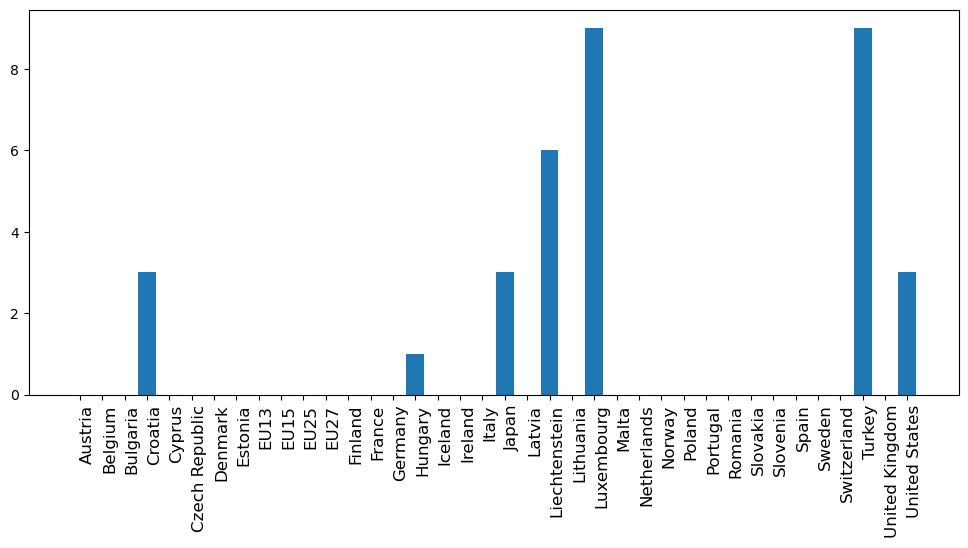

In [14]:
#Check what is going on in the data NaN
nan_countries=np.sum(np.where(edu2010.isnull(),1,0),axis=1)
plt.bar(np.arange(nan_countries.shape[0]),nan_countries)
plt.xticks(np.arange(nan_countries.shape[0]),countries,rotation=90,horizontalalignment='left',fontsize=12)
fig = plt.gcf()
fig.set_size_inches((12,5))

We don't have info on Albania, Macedonia and Greece. And very limited info from Liechtenstein, Luxembourg and Turkey. So let us work without them. 

<div class = "alert"> **NOTE** <p>There are some aggregated results such as EU13, EU15, EU25 and EU27. Moreover there are some reference countries such as Japan or United States. Depending on the method we use leaving these records might bias the results. </p></div>

Now let us check the features.

[1 0 3 0 3 0 0 0 0 0 0 3]


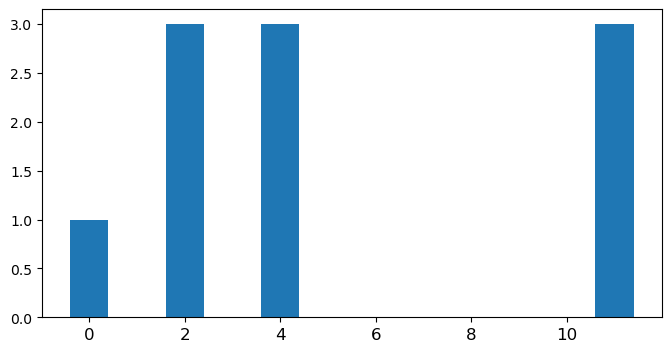

In [15]:
#Remove non info countries
wrk_countries = nan_countries<4
educlean=edu2010.loc[wrk_countries]
#Let us check the features we have
na_features = np.sum(np.where(educlean.isnull(),1,0),axis=0)
print(na_features)
plt.bar(np.arange(na_features.shape[0]),na_features)
plt.xticks(fontsize=12)
fig = plt.gcf()
fig.set_size_inches((8,4))

There are four features with missing data. At this point we can proceed in two ways:

+ **Drop** the features with missing values.
+ **Fill in** the features with some non-informative, non-biasing data.

If we have many features and only a few have missing values then it is not much harmful to drop them. However, if missing values are spread across the features we have to eventually deal with them. In our case both options seem reasonable, so we will proceed with both at the same time.

In [16]:
#Options A drop those features
edudrop=educlean.dropna(axis=1)
print ('Drop data shape: ' + str(edudrop.shape))

#Option B fill those features with some value, at risk of extracting wrong information
#Constant filling : edufill0=educlean.fillna(0)
edufill=educlean.fillna(educlean.mean())
print ('Filled in data shape: ' + str(edufill.shape))

Drop data shape: (35, 8)
Filled in data shape: (35, 12)


In the fill in option we have decided to fill the data with the mean value of the feature. This will not bias the distribution of the feature, though it has consequences in the interpretation of the results. Let us now apply a k-means clustering technique on this data in order to partition the countries according to their investment in education and check their profiles.

In [17]:
#Now we have clean data, create the data set to analyze
X_train = edudrop.values

from sklearn import cluster
clf = cluster.KMeans(init='k-means++', n_clusters=3, random_state=42)
clf.fit(X_train)
print (clf.labels_)
# OR 
y_pred_drop = clf.predict(X_train)
print (y_pred_drop)

[2 1 0 0 1 0 1 2 2 2 2 2 1 2 2 2 1 1 0 0 2 2 1 2 1 2 2 0 0 2 2 1 2 2 2]
[2 1 0 0 1 0 1 2 2 2 2 2 1 2 2 2 1 1 0 0 2 2 1 2 1 2 2 0 0 2 2 1 2 2 2]


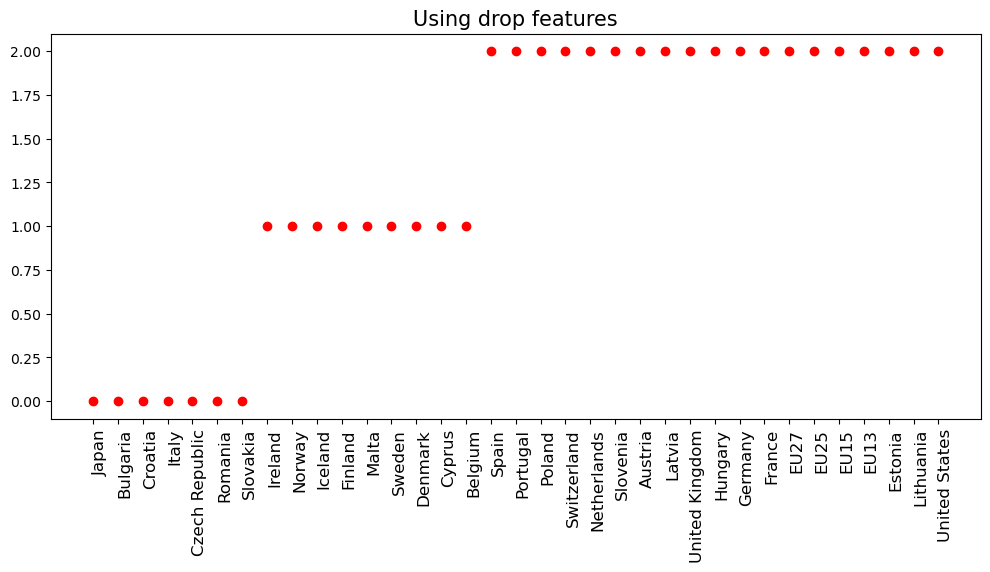

In [18]:
idx=y_pred_drop.argsort()
plt.plot(np.arange(35),y_pred_drop[idx],'ro')
wrk_countries_names = [countries[i] for i,item in enumerate(wrk_countries) if item ]

plt.xticks(np.arange(len(wrk_countries_names)),[wrk_countries_names[i] for i in idx],rotation=90,horizontalalignment='left',fontsize=12)
plt.title('Using drop features',size=15)
fig = plt.gcf()
fig.set_size_inches((12,5))


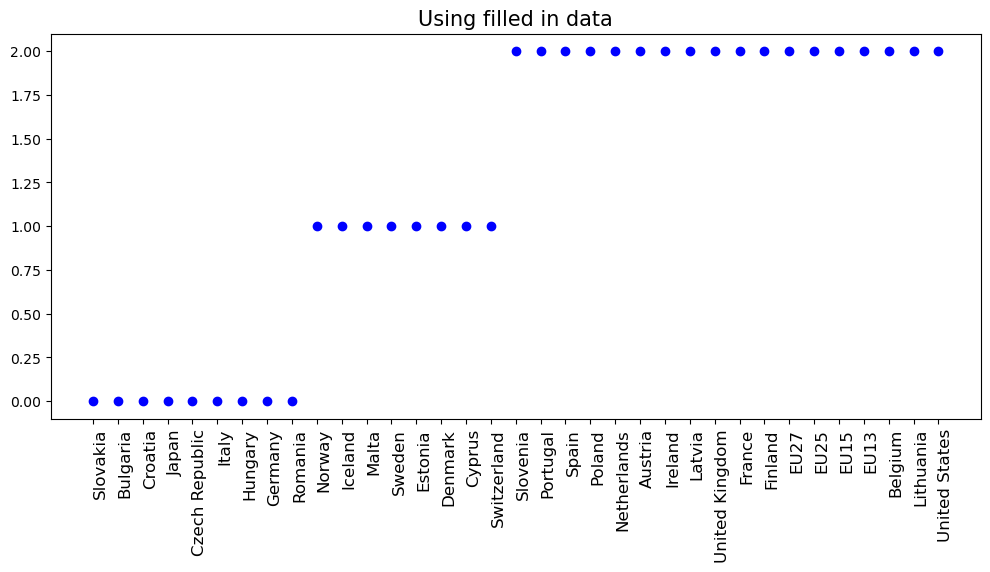

In [19]:
#Let us check with the filled version
X_train = edufill.values
clf.fit(X_train)
y_pred_fill = clf.predict(X_train)

idx=y_pred_fill.argsort()
plt.plot(np.arange(35),y_pred_fill[idx],'bo')
wrk_countries_names = [countries[i] for i,item in enumerate(wrk_countries) if item ]

plt.xticks(np.arange(len(wrk_countries_names)),[wrk_countries_names[i] for i in idx],rotation=90,horizontalalignment='left',fontsize=12)
plt.title('Using filled in data', size=15)
fig = plt.gcf()
fig.set_size_inches((12,5))

We have sorted the data for better visualization. At a simple glance we can see that both partitions can be different. We can better check this effect plotting the clusters values of one technique against the other.

**QUIZ** What do you expect if both clustering techniques partition the countries in the same way?

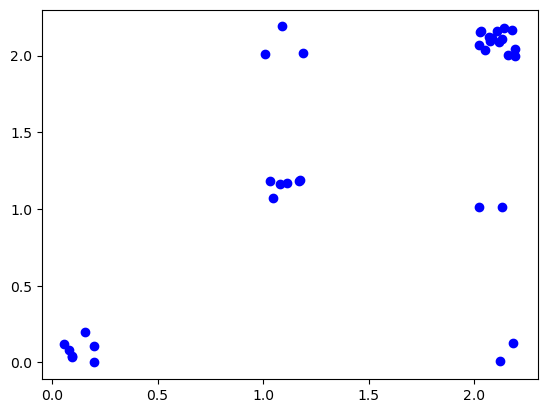

In [20]:
plt.plot(y_pred_drop+0.2*np.random.rand(35),y_pred_fill+0.2*np.random.rand(35),'bo')

Well, looking at both methods, both may yield the same results, but not often. This is mainly due to two aspects: the random initialization of the k-means clustering and the fact that each method work in a different space (dropped data vs filled-in data). Let us check the list of countries in both methods. Do not consider the cluster value, since it is irrelevant.

In [21]:
print ('Cluster 0: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_drop) if item==0]))
print ('Cluster 0: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_fill) if item==0]))
print ('\n')
print ('Cluster 1: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_drop) if item==1]))
print ('Cluster 1: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_fill) if item==1]))
print ('\n')
print ('Cluster 2: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_drop) if item==2]))
print ('Cluster 2: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_fill) if item==2]))
print ('\n')


Cluster 0: 
['Bulgaria', 'Croatia', 'Czech Republic', 'Italy', 'Japan', 'Romania', 'Slovakia']
Cluster 0: 
['Bulgaria', 'Croatia', 'Czech Republic', 'Germany', 'Hungary', 'Italy', 'Japan', 'Romania', 'Slovakia']


Cluster 1: 
['Belgium', 'Cyprus', 'Denmark', 'Finland', 'Iceland', 'Ireland', 'Malta', 'Norway', 'Sweden']
Cluster 1: 
['Cyprus', 'Denmark', 'Estonia', 'Iceland', 'Malta', 'Norway', 'Sweden', 'Switzerland']


Cluster 2: 
['Austria', 'Estonia', 'EU13', 'EU15', 'EU25', 'EU27', 'France', 'Germany', 'Hungary', 'Latvia', 'Lithuania', 'Netherlands', 'Poland', 'Portugal', 'Slovenia', 'Spain', 'Switzerland', 'United Kingdom', 'United States']
Cluster 2: 
['Austria', 'Belgium', 'EU13', 'EU15', 'EU25', 'EU27', 'Finland', 'France', 'Ireland', 'Latvia', 'Lithuania', 'Netherlands', 'Poland', 'Portugal', 'Slovenia', 'Spain', 'United Kingdom', 'United States']




We have been a little careless and proceeded with clean data but unnormalized. Let us go into a little more detail in the data. For the sake of simplicity let us work just with the drop set.

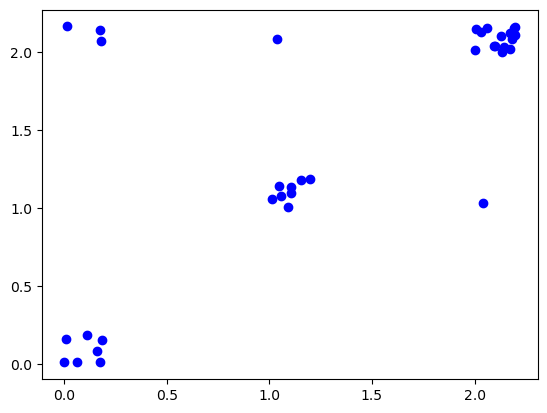

In [22]:
from sklearn.preprocessing import StandardScaler
y_pred_drop_unnorm=y_pred_drop.copy()
X_train = edudrop.values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
clf.fit(X_train)
y_pred_drop = clf.predict(X_train)

plt.plot(y_pred_drop+0.2*np.random.rand(35),y_pred_drop_unnorm+0.2*np.random.rand(35),'bo')

**QUIZ:** Ups, in this case it seems both clustering techniques yield the same clusters. Why do you think both yield the same results? Shouldn't normalization help?

If you check the data set not all the features are in the same scale. However, we have precisely dropped those that are at different scale than the majority. The remaining are at the same scale. Let us now check the clusters:

In [23]:
print ('Cluster 0: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_drop) if item==0]))

print ('Cluster 1: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_drop) if item==1]))

print ('Cluster 2: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_drop) if item==2]))

Cluster 0: 
['Bulgaria', 'Croatia', 'Czech Republic', 'Hungary', 'Italy', 'Japan', 'Latvia', 'Romania', 'Slovakia', 'Spain']
Cluster 1: 
['Cyprus', 'Denmark', 'Finland', 'Iceland', 'Ireland', 'Malta', 'Norway', 'Sweden', 'United Kingdom']
Cluster 2: 
['Austria', 'Belgium', 'Estonia', 'EU13', 'EU15', 'EU25', 'EU27', 'France', 'Germany', 'Lithuania', 'Netherlands', 'Poland', 'Portugal', 'Slovenia', 'Switzerland', 'United States']


And check the profile of the clusters by looking at the centroids:

In [26]:
clf.cluster_centers_[1][:,np.newaxis]

array([[1.0971802 ],
       [1.22591384],
       [0.04538862],
       [1.12997571],
       [1.0086995 ],
       [1.14617066],
       [1.31914862],
       [1.35031454]])

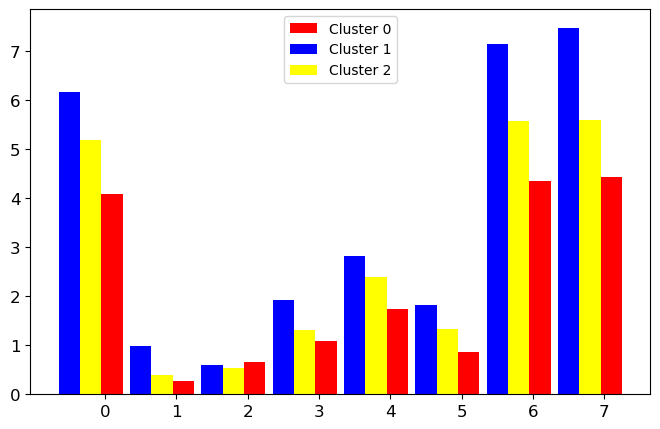

In [39]:
width=0.3
c_centers = scaler.inverse_transform(clf.cluster_centers_)
p1 = plt.bar(np.arange(8),c_centers[1],width,color='b')
p2 = plt.bar(np.arange(8)+width,c_centers[2],width,color='yellow')
p0 = plt.bar(np.arange(8)+2*width,c_centers[0],width,color='r')
plt.legend( (p0[0], p1[0], p2[0]), ('Cluster 0', 'Cluster 1', 'Cluster 2') ,loc=9)
plt.xticks(np.arange(8) + 0.5, np.arange(8),size=12)
plt.yticks(size=12)
fig = plt.gcf()
fig.set_size_inches((8,5))

It looks like cluster `1` spends more on education while cluster `0` is the one with less resources on education. Just a remark, Spain is in cluster `0`. Let us refine a little more cluster `0` and check how close are members from this cluster to cluster `1`. This may give us a hint on a possible ordering. 

In [41]:
p = distance.cdist(X_train[y_pred_drop==0,:],[clf.cluster_centers_[0]],'euclidean')
plt.bar(np.arange(p.shape[0]),p.ravel())

NameError: name 'distance' is not defined

([<matplotlib.axis.XTick at 0x17dd31100>,
 [Text(0, 0, 'Bulgaria'),
  Text(1, 0, 'Croatia'),
  Text(2, 0, 'Czech Republic'),
  Text(3, 0, 'Hungary'),
  Text(4, 0, 'Italy'),
  Text(5, 0, 'Japan'),
  Text(6, 0, 'Latvia'),
  Text(7, 0, 'Romania'),
  Text(8, 0, 'Slovakia'),
  Text(9, 0, 'Spain')])

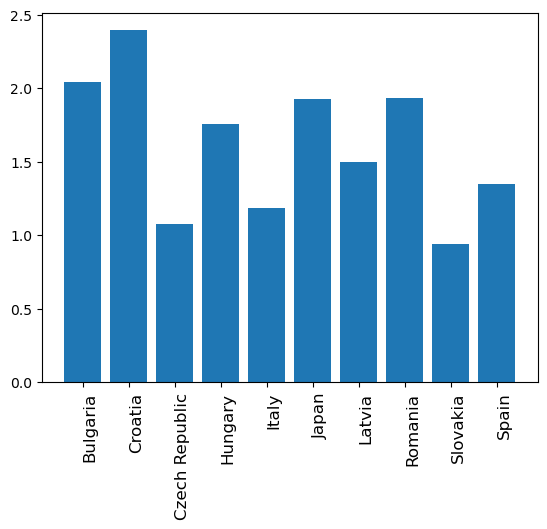

In [42]:
from scipy.spatial import distance
p = distance.cdist(X_train[y_pred_drop==0,:],[clf.cluster_centers_[0]],'euclidean')
plt.bar(np.arange(p.shape[0]),p.ravel())

wrk_countries_names = [countries[i] for i,item in enumerate(wrk_countries) if item ]
zero_countries_names = [wrk_countries_names[i] for i,item in enumerate(y_pred_drop) if item==0]
plt.xticks(np.arange(len(zero_countries_names)),zero_countries_names,rotation=90,horizontalalignment='left',fontsize=12)

Well, it seems that Spain though in cluster `0` is the closest to change to a policy in the lines of the other clusters.

Additionally we can also check the distance to the centroid of cluster `0`.

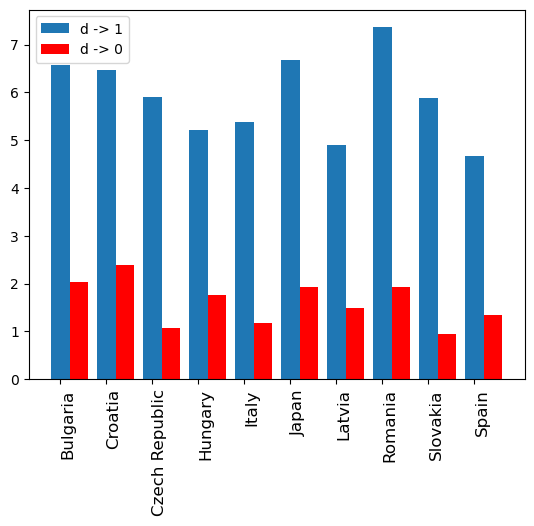

In [43]:
from scipy.spatial import distance
p = distance.cdist(X_train[y_pred_drop==0,:],[clf.cluster_centers_[1]],'euclidean')
pown = distance.cdist(X_train[y_pred_drop==0,:],[clf.cluster_centers_[0]],'euclidean')

width=0.4
p0=plt.bar(np.arange(p.shape[0]),p.ravel(),width)
p1=plt.bar(np.arange(p.shape[0])+width,pown.ravel(),width,color = 'red')

wrk_countries_names = [countries[i] for i,item in enumerate(wrk_countries) if item ]
zero_countries_names = [wrk_countries_names[i] for i,item in enumerate(y_pred_drop) if item==0]
plt.xticks(np.arange(len(zero_countries_names)),zero_countries_names,rotation=90,horizontalalignment='left',fontsize=12)
plt.legend( (p0[0], p1[0]), ('d -> 1', 'd -> 0') ,loc=2)


### 2.1.2 The number of clusters
The number of cluster has been arbitrarely chosen. We will explore the **elbow/knee technique** for looking for a "good" number $K$. Other references for finding the number of clusters are the GAP statistic or $f(K)$ (Pham et al. 2004) among others.

#### The elbow technique.

By the definition of clustering we want clusters to be compact. The notion of compactness can be measured by checking the distance of the members of the cluster to its centroid. The average distance to its centroid is a naive measure of the overall quality of the cluster. The elbow technique distinguish two phases in the process of checking this value against the number of clusters. In the first phase, the average will decrease dramatically. In the secon phase, it will slowly stabilize. The elbow technique consists of selecting the value where this transition occurs. This can not always be easily found. 

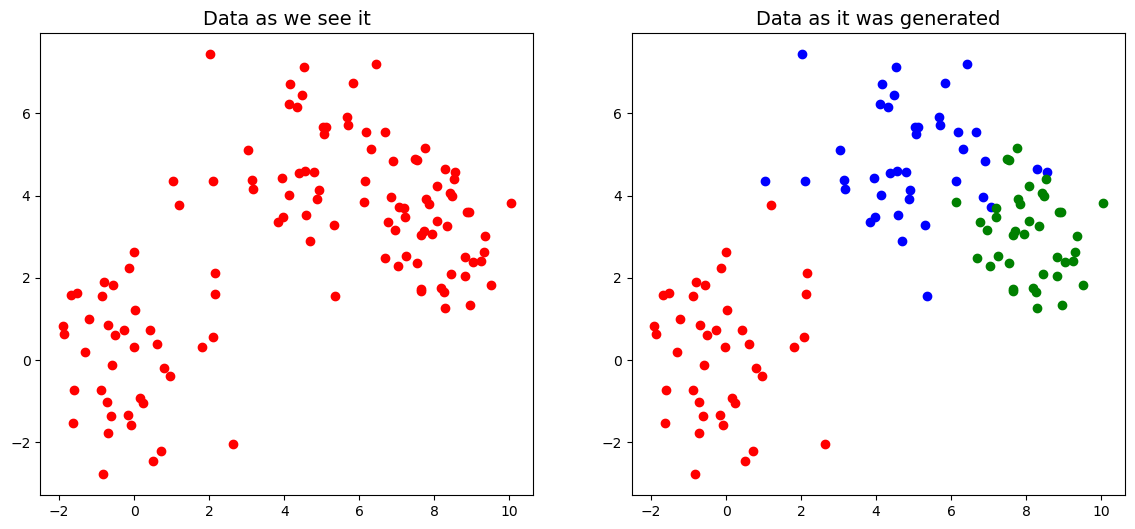

In [44]:
import numpy as np
import matplotlib.pyplot as plt
#Create some data
MAXN=40
X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
X = np.concatenate([X,[8,3]+1*np.random.randn(MAXN,2)])

#Just for visualization purposes
y = np.concatenate([np.ones((MAXN,1)),2*np.ones((MAXN,1))])
y = np.concatenate([y,3*np.ones((MAXN,1))])

plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],color='r')
plt.title('Data as we see it', size=14)

plt.subplot(1,2,2)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
plt.title('Data as it was generated',size=14)
fig=plt.gcf()
fig.set_size_inches((14,6))

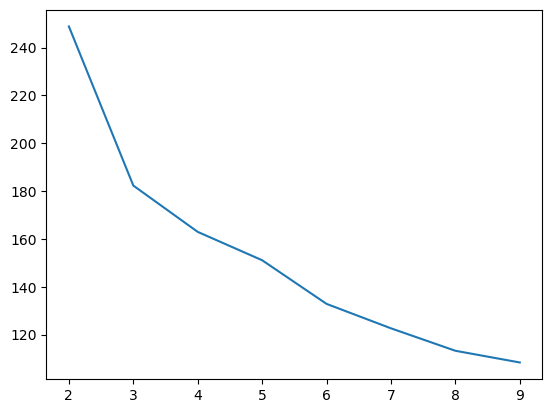

In [45]:
from sklearn import cluster
from scipy.spatial import distance

d=[]
for K in range(2,10):
    clf = cluster.KMeans(init='random', n_clusters=K, random_state=0)
    clf.fit(X)
    y_pred = clf.predict(X)
    p=[]
    for i in range(K):
        p.append(np.sum(distance.cdist(X[y_pred==i,:],[clf.cluster_centers_[i]],'euclidean')))
    d.append(np.sum(p))
plt.plot(np.arange(2,10),d)

Checking at this graph it seems that $3$ is a good number of clusters. What in the case of the Eurostat data?

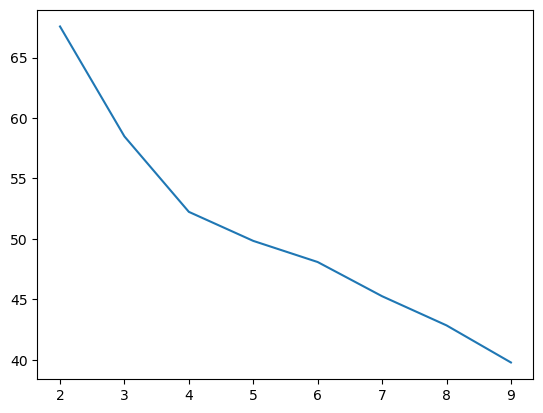

In [46]:
from sklearn import cluster
d=[]
for K in range(2,10):
    clf = cluster.KMeans(init='random', n_clusters=K, random_state=0)
    clf.fit(X_train)
    y_pred = clf.predict(X_train)
    p=[]
    for i in range(K):
        p.append(np.sum(distance.cdist(X_train[y_pred==i,:],[clf.cluster_centers_[i]],'euclidean')))
    d.append(np.sum(p))
plt.plot(np.arange(2,10),d)


It looks like $4$ can be a better choice. 

Let us redo the clustering with $4$ and see what we can conclude.

In [47]:
X_train = edudrop.values
clf = cluster.KMeans(init='k-means++', n_clusters=4, random_state=0)
clf.fit(X_train)
y_pred = clf.predict(X_train)

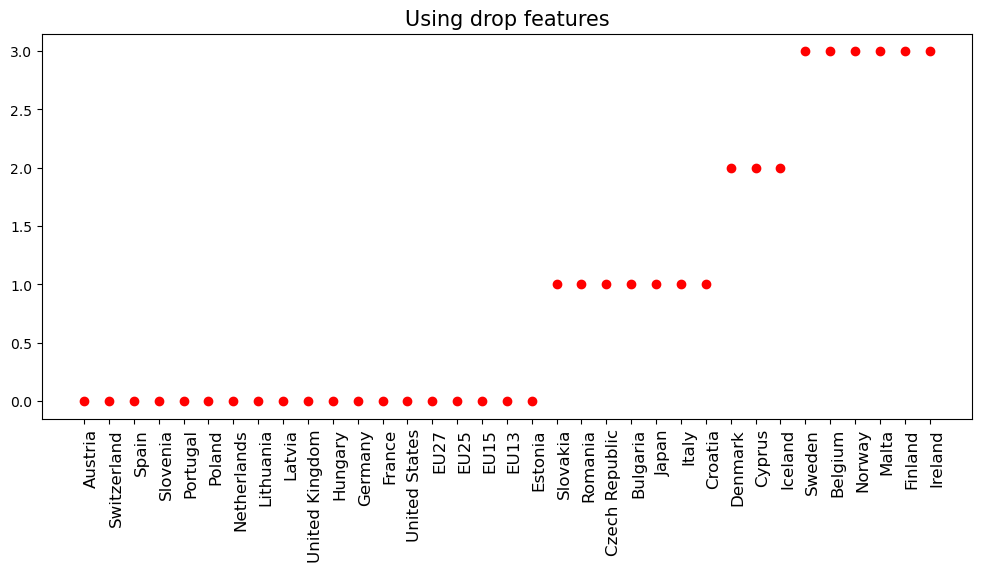

In [48]:
idx=y_pred.argsort()
plt.plot(np.arange(35),y_pred[idx],'ro')
wrk_countries_names = [countries[i] for i,item in enumerate(wrk_countries) if item ]

plt.xticks(np.arange(len(wrk_countries_names)),[wrk_countries_names[i] for i in idx],rotation=90,horizontalalignment='left',fontsize=12)
plt.title('Using drop features',size=15)
fig = plt.gcf()
fig.set_size_inches((12,5))

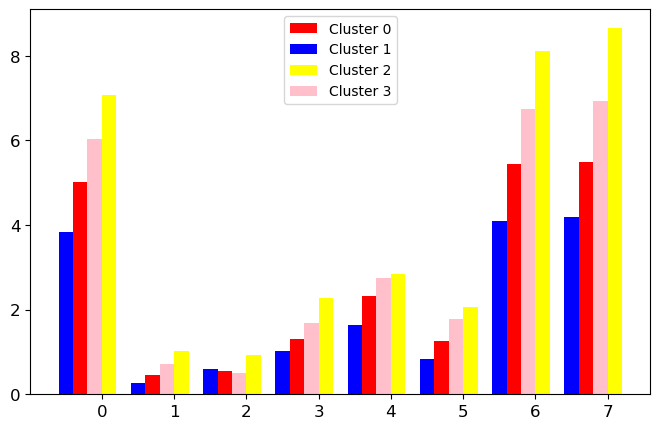

In [49]:
width=0.2
p0 = plt.bar(np.arange(8)+1*width,clf.cluster_centers_[0],width,color='r')
p1 = plt.bar(np.arange(8),clf.cluster_centers_[1],width,color='b')
p2 = plt.bar(np.arange(8)+3*width,clf.cluster_centers_[2],width,color='yellow')
p3 = plt.bar(np.arange(8)+2*width,clf.cluster_centers_[3],width,color='pink')

plt.legend( (p0[0], p1[0], p2[0], p3[0]), ('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3') ,loc=9)
plt.xticks(np.arange(8) + 0.5, np.arange(8),size=12)
plt.yticks(size=12)

fig = plt.gcf()
fig.set_size_inches((8,5))

Spain is still in cluster `0`. But as we observed in our previous clustering it was very close to changing cluster. This time cluster `0` includes the averages values for the EU members. Just for the sake of completeness, let us write down the name of the countries in cluster `0`, `1`,  and `3`.

In [50]:
print ('Cluster 0: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred) if item==0]))

print ('Cluster 1: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred) if item==1]))

print ('Cluster 3: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred) if item==3]))

#Save data for future use.
import pickle
ofname = open('edu2010.pkl', 'wb')
s = pickle.dump([edu2010, wrk_countries_names,y_pred ],ofname)
ofname.close()

Cluster 0: 
['Austria', 'Estonia', 'EU13', 'EU15', 'EU25', 'EU27', 'France', 'Germany', 'Hungary', 'Latvia', 'Lithuania', 'Netherlands', 'Poland', 'Portugal', 'Slovenia', 'Spain', 'Switzerland', 'United Kingdom', 'United States']
Cluster 1: 
['Bulgaria', 'Croatia', 'Czech Republic', 'Italy', 'Japan', 'Romania', 'Slovakia']
Cluster 3: 
['Belgium', 'Finland', 'Ireland', 'Malta', 'Norway', 'Sweden']


<div class="alert alert-info">TAKE HOME NOTES:
<p>
<ul>
<li>K-means is a simple but quite powerful clustering partition technique.
<li>It is very sensitive to variance differences on the features / features at different scales.
<li>It is resistant to irrelevant dimensions as far as they do not introduce biases.
</ul>
</div>

## 3. Hierarchical clustering

Another interesting clustering technique is hierarchical clustering. This is a nice tool because of its interpretability. The result of the technique is a tree showing the similarity among the samples. Partitioning is computed by selecting a cut on that tree at a certain level. The tree is usually called **dendrogram**.

**Bottom-Up agglomerative clustering sketch of algorithm**

+ Starts with each sample data in a separate cluster
+ then repeatedly joins the closest pair of clusters,
+ until there is only one cluster.

The history of merging forms a binary tree or hierarchy.

**Top-Down divisive clustering sketch of algorithm**

+ Starting with all the data in a single cluster,
+ Consider every possible way to divide the cluster into two. Choose the best division
+ And recursively operate on both sides.


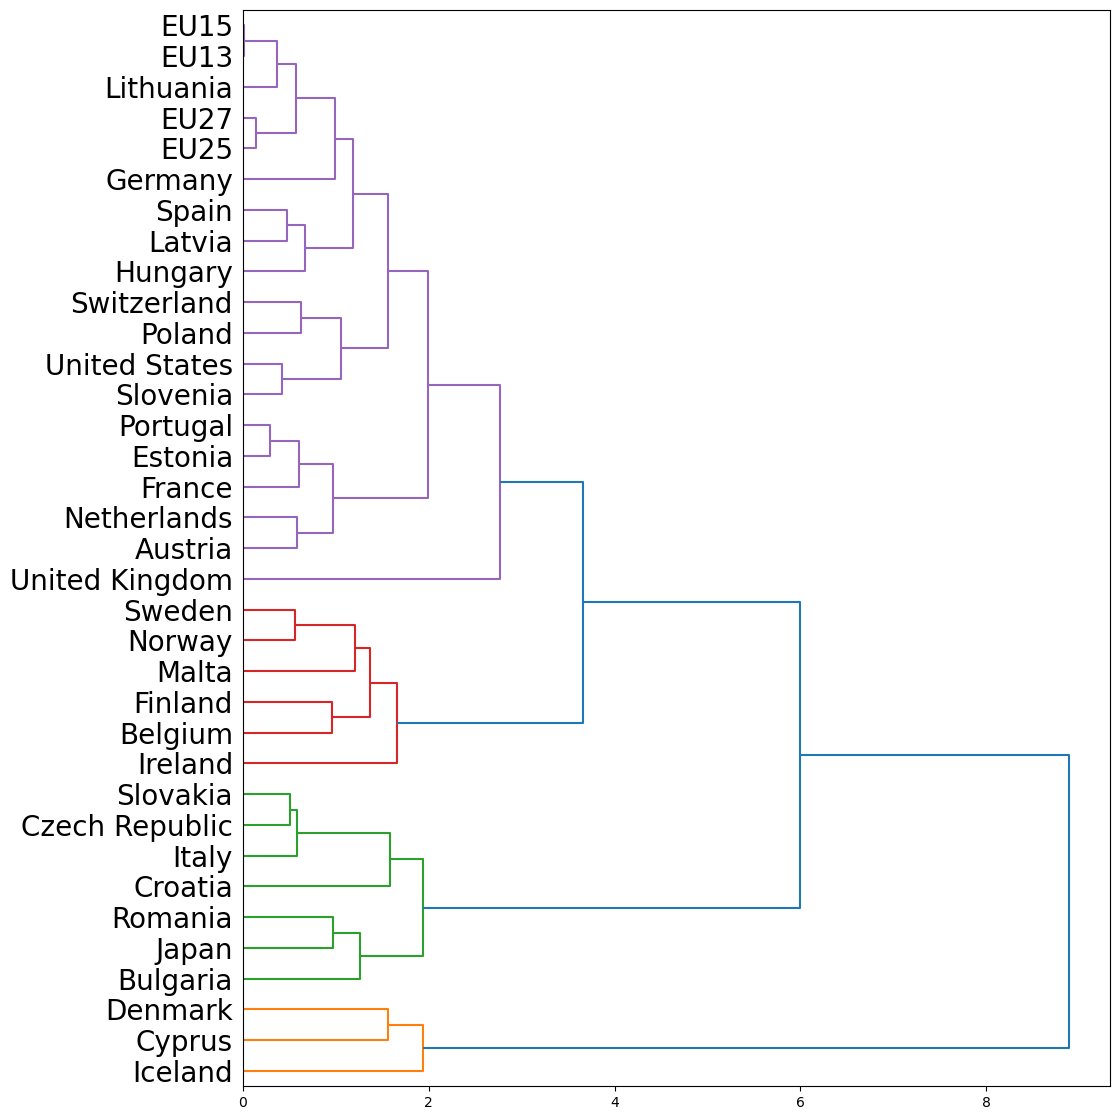

In [51]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

X_train = edudrop.values
dist = pdist(X_train,'euclidean')
linkage_matrix = linkage(dist,method = 'complete');
plt.figure(figsize=(11.3, 11.3))  # we need a tall figure

dendrogram(linkage_matrix, orientation="right", color_threshold = 3,labels = wrk_countries_names, leaf_font_size=20);

plt.tight_layout()  # fixes margins

### Defining the similarity of two clusters

At some point in the algorithm we have to comptute the similarity of two  clusters, but how to do it when each one possibly contains multiple instances?

+ Single link: Similarity of two most similar members. It can create chain effects, such as follow the nearest neighbor.
+ Complete link: Similarity of two least similar members. It will give tight spherical clusters.
+ Group average: Average similarity between members.

## 4. Density-based clustering - DBSCAN

Our last method in this notebook will be DBSCAN. In order to illustrate it we will add some spice to our problem. But before let us check on the theoretical and algorithmic basis of the technique.

Up to this point we have considered clustering as finding data groups following a notion of **compactness**. Another way of looking at what a cluster is is given by **connectivity**.

Let us check an example of the difference of both:

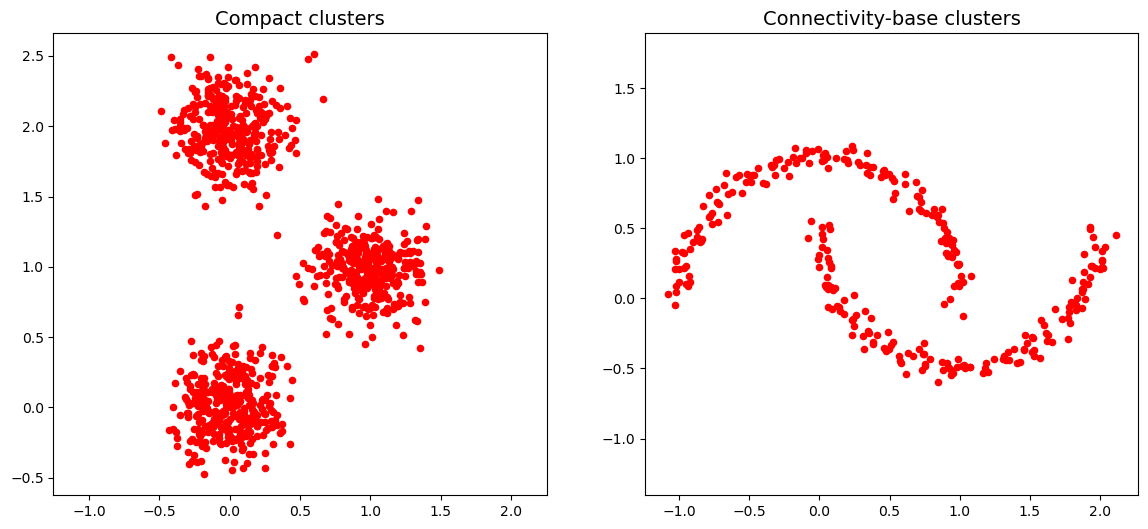

In [52]:
from sklearn.datasets import make_moons, make_blobs
import matplotlib.pyplot as plt

centres = [[1, 1], [0, 0], [0, 2]]
#CHANGE cluster_std=[0.2,0.2] by just 0.2
X, labels_true = make_blobs(n_samples=1000, n_features=2, centers=centres, cluster_std=0.2)
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c='r', marker='o',s=20) 
plt.axis('equal')
plt.title('Compact clusters',size=14)

[X, y] = make_moons(n_samples=300, noise=.05)
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c='r', marker='o',s=20) 
plt.axis('equal')
plt.title('Connectivity-base clusters', size=14)
fig = plt.gcf()
fig.set_size_inches((14,6))

Let us apply our knowledge of clustering up to this point and solve the rightmost problem using k-means.

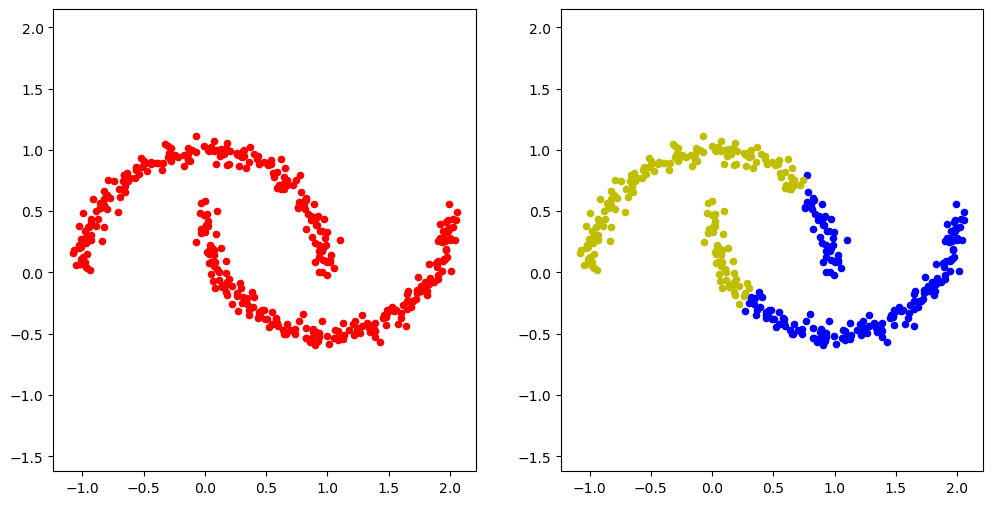

In [53]:
%reset -f
%matplotlib inline
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn import cluster

# Connectivity based clustering dataset
[X, y] = make_moons(n_samples=400, noise=.05, random_state=0)
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c='r', marker='o',s=20) 
plt.axis('equal')

# Cluster using k-means
clf = cluster.KMeans(n_clusters=2,init='k-means++')
clf.fit(X)
y_pred=clf.predict(X)
plt.subplot(1,2,2)
plt.scatter(X[y_pred==0, 0], X[y_pred==0, 1], c='b', marker='o',s=20) 
plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1], c='y', marker='o',s=20) 
plt.axis('equal')
fig=plt.gcf()
fig.set_size_inches((12,6))

The results are not satisfactory. K-means clusters assume that all data belonging to a cluster is close to each other. In the last example this does not happen. There are points corresponding to the same visual cluster that are far away from each other. However it is clear to us that in the two moons example there are two different clusters. In this case the notion of cluster comes from the fact that data points are somewhat connected. This notion is exploited and generalized in the so called density based methods.

Density based methods are characterized by the following properties

+ Clusters are dense regions of data separated by regions of lower data density,
+ A cluster is defined as a maximal set of densely-connected points.

With these two last properties, the methods of this family are able to discover clusters of arbitrary shape. As an example of these family of techniques we have **DBSCAN**. As advertised by its authors, 


> The DBSCAN algorithm identifies clusters in large spatial data sets by looking at the local density of database elements, using only one input parameter. Furthermore, the user gets a suggestion on which parameter value that would be suitable. Therefore, minimal knowledge of the domain is required. The DBSCAN can also determine what information should be classified as noise or outliers. In spite of this, its working process is quick and scales very well with the size of the database – almost linearly.
By using the density distribution of nodes in the database, DBSCAN can categorize these nodes into separate clusters that define the different classes. DBSCAN can find clusters of arbitrary shape. However, clusters that lie close to each other tend to belong to the same class.

In order to understand DBSCAN we have to define two concepts, namely the **neighborhood** of a data point and what **high-density** means.

The notion of **Neighborhood** can be defined as the set of points $q$ within a radius of $\epsilon$ from a query point $p$.
$$N_{\epsilon}(p) = \{q\big|\;d(p,q)\leq\epsilon\}$$

With respect to **“high density”** we can that a region of the space is densely populated if within an $\epsilon$-Neighborhood of a data point we find at least <span style="color:red">*MinPoints*</span> other data points.


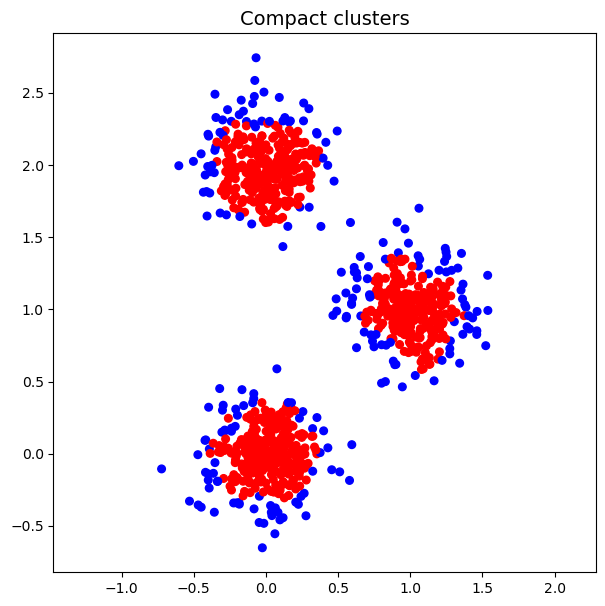

In [54]:
#Example of a set of points using minpts = 4 and check in different colors those that have high density and those who does not.
from sklearn.datasets import make_moons, make_blobs
import matplotlib.pyplot as plt

centres = [[1, 1], [0, 0], [0, 2]]
X, labels_true = make_blobs(n_samples=1000, centers=centres, cluster_std=0.2)

epsilon = 0.1
minpts = 10

#Create similarity matrix
from scipy.spatial.distance import pdist,squareform
import numpy as np
#Create similarity matrix
d=squareform(pdist(X,'euclidean'))
d_eps=np.where(d<epsilon,1,0)
core = np.sum(d_eps,axis=0)
colors=np.where(core>=minpts,'r','b')

plt.scatter(X[:, 0], X[:, 1], c=colors, marker='o',s=30) 
plt.axis('equal')
plt.title('Compact clusters',size=14)
plt.gcf().set_size_inches((7,7))


Observe the result in the former figure. Red points are the densely populated areas with center a certain data point. Blue points correspond to points with low population. Note that blue points are found at the "boundary" of the cluster.

Additionally, we may find data that is unconnected. We call this new type of data **outliers**. We can easily identify isolated data checking that they are only connected to themselves.

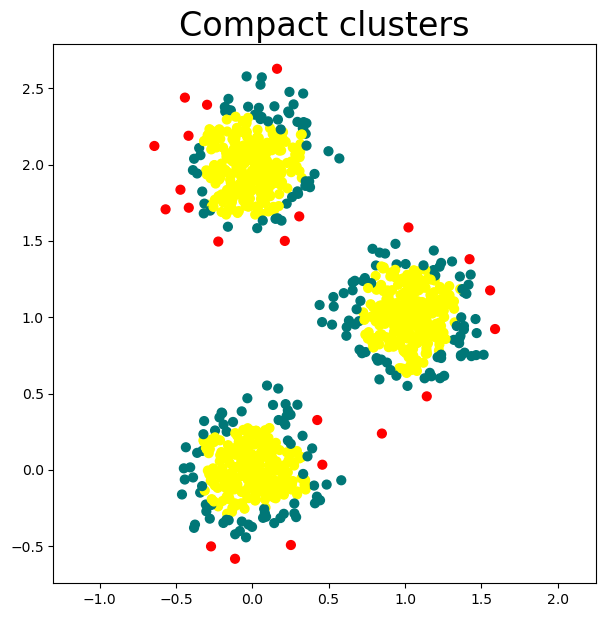

In [55]:
#Example of a set of points using minpts = 4 and check in different colors those that have high density and those who does not.
from sklearn.datasets import make_moons, make_blobs
import matplotlib.pyplot as plt

centres = [[1, 1], [0, 0], [0, 2]]
X, labels_true = make_blobs(n_samples=1000, centers=centres, cluster_std=0.2)

epsilon = 0.1
minpts = 10

#Create similarity matrix
from scipy.spatial.distance import pdist,squareform
import numpy as np
#Create similarity matrix
d=squareform(pdist(X,'euclidean'))
d_eps=np.where(d<epsilon,1,0)
core = np.sum(d_eps,axis=0)

#Each point is always connected to itself. Thus we need to add one more point to the computation
colors=np.where(core>=minpts+1,'#FFFF00','#007777')
#Find outliers. Outliers are connected to themselves alone
colors = np.where(core<=1,'#FF0000',colors)

plt.scatter(X[:, 0], X[:, 1], c=colors, marker='o',s=40) 
plt.axis('equal')
plt.title('Compact clusters',size=24)
plt.gcf().set_size_inches((7,7))

In this new visualization, yellow stands for **CORE** samples, gree for boundary points and red for outliers. Let us check the results on the two moons example:

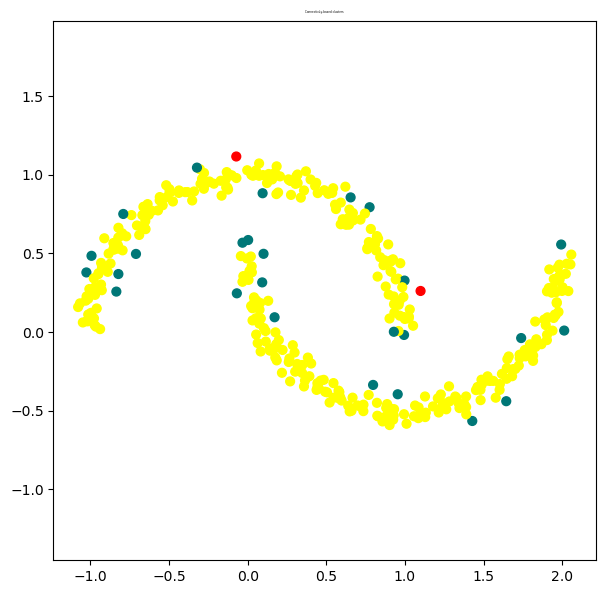

In [56]:
#Example of a set of points using minpts = 4 and check in different colors those that have high density and those who does not.
from sklearn.datasets import make_moons, make_blobs
import matplotlib.pyplot as plt


# Connectivity based clustering dataset
[X, y] = make_moons(n_samples=400, noise=.05, random_state=0)
epsilon = 0.1
minpts = 4

#Create similarity matrix
from scipy.spatial.distance import pdist,squareform
import numpy as np
#Create similarity matrix
d=squareform(pdist(X,'euclidean'))
d_eps=np.where(d<epsilon,1,0)
core = np.sum(d_eps,axis=0)

#Each point is always connected to itself. Thus we need to add one more point to the computation
colors=np.where(core>=minpts+1,'#FFFF00','#007777')
#Find outliers. Outliers are connected to themselves alone
colors = np.where(core<=1,'#FF0000',colors)

plt.scatter(X[:, 0], X[:, 1], c=colors, marker='o',s=40) 
plt.axis('equal')
plt.title('Connectivity-based clusters',size=2)
plt.gcf().set_size_inches((7,7))

Now let us connect the data points in clusters. In order to do so we have to define a new concept. We define **directly density-reachable** as follows: 
>An object q is directly density-reachable from object p if p is a core object and q is in p’s $\epsilon$-neighborhood.

We can build a chain of points that are directly reachable starting from a random point.

In [57]:
#Example of a set of points using minpts = 4 and check in different colors those that have high density and those who does not.
from sklearn.datasets import make_moons, make_blobs
import matplotlib.pyplot as plt


# Connectivity based clustering dataset
[X, y] = make_moons(n_samples=400, noise=.05, random_state=0)
epsilon = 0.2
minpts = 4

#Create similarity matrix
from scipy.spatial.distance import pdist,squareform
import numpy as np
#Create similarity matrix
d=squareform(pdist(X,'euclidean'))
d_eps=np.where(d<epsilon,1,0)
core = np.sum(d_eps,axis=0)


We select a random point.

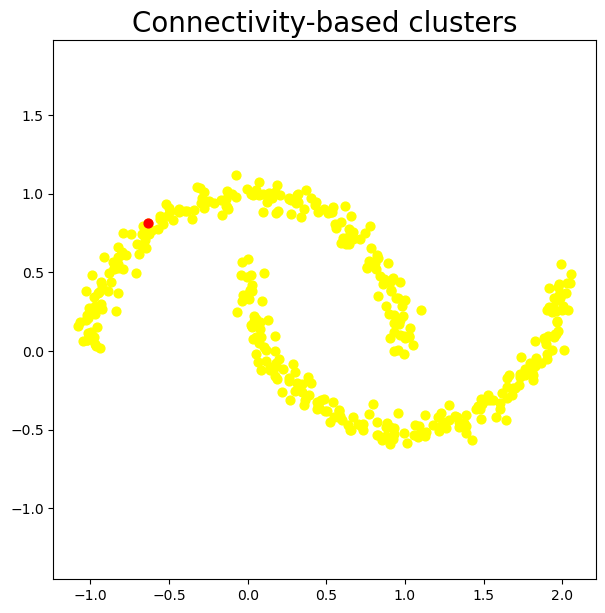

In [60]:
#Step 1: Select a random point.
from numpy import random
idx = random.randint(X.shape[0])

cluster = [idx]
to_visit = []
visited = []

plt.scatter(X[:, 0], X[:, 1], c='#FFFF00', marker='o',s=40) 
plt.scatter(X[idx, 0], X[idx, 1], c='#FF0000', marker='o',s=40) 
plt.axis('equal')
plt.title('Connectivity-based clusters',size=20)

plt.gcf().set_size_inches((7,7))

Check its $\epsilon$-neighborhood.

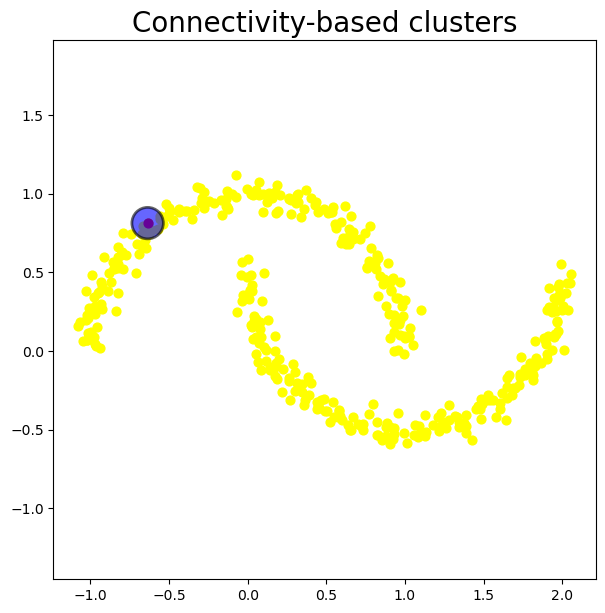

In [61]:
plt.scatter(X[:, 0], X[:, 1], c='#FFFF00', marker='o',s=40) 
plt.scatter(X[idx, 0], X[idx, 1], c='#FF0000', marker='o',s=40) 
plt.axis('equal')
plt.title('Connectivity-based clusters',size=20)

circle1=plt.Circle((X[idx, 0], X[idx, 1]),.1,linewidth=2,fill=True,alpha=0.6, facecolor = 'b',edgecolor='k')
fig = plt.gcf()
fig.gca().add_artist(circle1)


plt.gcf().set_size_inches((7,7))

Count the number of point inside the $\epsilon$-neighborhood, and see what kind of point it is (core, boundary, outlier). If it is core we label all directly reachable as members of the same class.

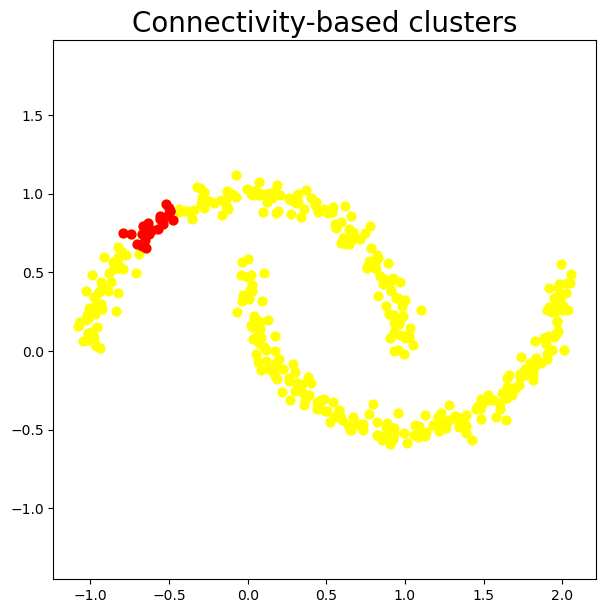

In [62]:
#Step 2: Label all points density reachable as members of the same class
cluster.extend(np.where(d_eps[:,idx])[0].tolist())
to_visit.extend(np.where(d_eps[:,idx])[0].tolist())
visited.extend([idx])
#Remove duplicates
cluster = list(set(cluster))
to_visit = list(set(cluster))
#Visualization
plt.scatter(X[:, 0], X[:, 1], c='#FFFF00', marker='o',s=40) 
plt.scatter(X[cluster, 0], X[cluster, 1], c='#FF0000', marker='o',s=40) 
plt.axis('equal')
plt.title('Connectivity-based clusters',size=20)
plt.gcf().set_size_inches((7,7))

Then we take a new point from the recently found cluster set and repeat the process.

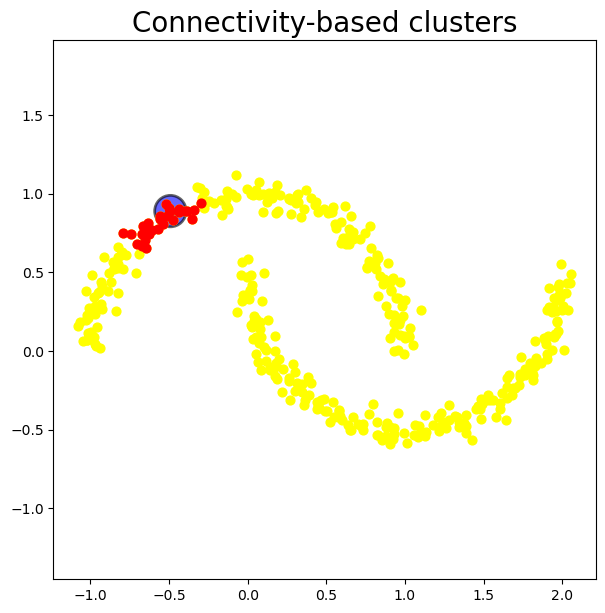

In [63]:
#Take the first element of the to_visit list and repeat
idx = to_visit.pop(0)

#Step 2: Label all points density reachable as members of the same class
cluster.extend(np.where(d_eps[:,idx])[0].tolist())
to_visit.extend(np.where(d_eps[:,idx])[0].tolist())
visited.extend([idx])
#Remove duplicates
cluster = list(set(cluster))
to_visit = list(set(to_visit))

#Visualization
circle1=plt.Circle((X[idx, 0], X[idx, 1]),.1,linewidth=2,fill=True,alpha=0.6, facecolor = 'b',edgecolor='k')
fig = plt.gcf()
fig.gca().add_artist(circle1)
plt.scatter(X[:, 0], X[:, 1], c='#FFFF00', marker='o',s=40) 
plt.scatter(X[cluster, 0], X[cluster, 1], c='#FF0000', marker='o',s=40) 
plt.axis('equal')
plt.title('Connectivity-based clusters',size=20)
plt.gcf().set_size_inches((7,7))

We can repeat this code while there are elements in the list and we will have a simplistic version of the DBSCAN technique. In order to have the complete version we should take into account the notions of CORE and OUTLIER. We should furthermore explore all points in the data set in order to find the different clusters.

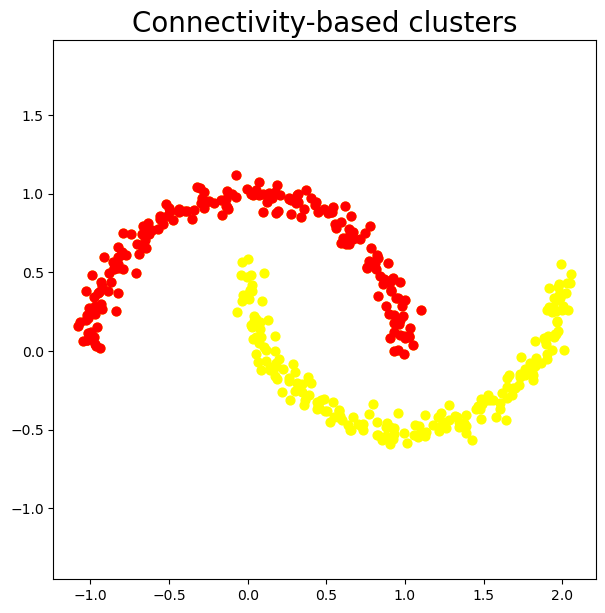

In [64]:
while len(to_visit)>0:    #Take the first element of the to_visit list and repeat
    idx = to_visit.pop(0)

    #Step 2: Label all points density reachable as members of the same class
    cluster.extend(np.where(d_eps[:,idx])[0].tolist())
    to_visit.extend([item for item in np.where(d_eps[:,idx])[0].tolist() if item not in visited])
    visited.extend([idx])
    cluster = list(set(cluster))
    to_visit = list(set(to_visit))

#Visualization
plt.scatter(X[:, 0], X[:, 1], c='#FFFF00', marker='o',s=40) 
plt.scatter(X[list(cluster), 0], X[list(cluster), 1], c='#FF0000', marker='o',s=40) 
plt.axis('equal')
plt.title('Connectivity-based clusters',size=20)
plt.gcf().set_size_inches((7,7))


<div class = "alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;"> **APPLICATIONS:**
<p>
The use of DBSCAN requires certain knowledge about the domain for setting the parameters $\epsilon$ and *MinPts*. One domain where these parameters can be easily undestood is geospatial clustering of geo-referenced data. In this case clustering answers the problem of finding smaller subgroups considering spatial proximity. A simple scenario would be to find the optimal area with more stores of a certain kind with the goal of minimize the travel time. Consider another problem where moving comsumes a certain resource (e.g. gas) and we need to refuel. We could ask, given a distribution of refuel stations which is the maximum distance I can move without running out of fuel? </p></div>


### Finding a good value for $\epsilon$ and *MinPts*

A simple idea for finding a reasonable approximation for the values of $\epsilon$ and *MinPts* is to use the distance to the k-th nearest neighbor. If we consider that we have set *MinPts* to the value $k$, then we are assuming that the k-th elements closer to a point have similar distances. On the other hand, noise points have the k-th nearest neighbor at a farther distance. We can check this behavior in a plot and check the change in tendency.

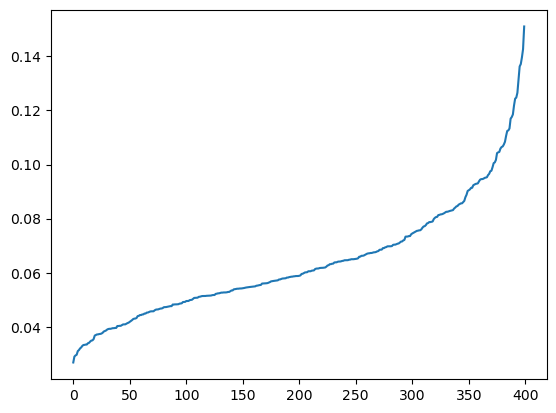

In [65]:
#Example of a set of points using minpts = 4 and check in different colors those that have high density and those who does not.
from sklearn.datasets import make_moons, make_blobs
import matplotlib.pyplot as plt


# Connectivity based clustering dataset
[X, y] = make_moons(n_samples=400, noise=.05, random_state=0)

#Create similarity matrix
from scipy.spatial.distance import pdist,squareform
import numpy as np
#Create similarity matrix
d=squareform(pdist(X,'euclidean'))

k = 4
d.sort(axis=0)
plot_data=d[k,:]
plot_data.sort()
plt.plot(np.arange(d.shape[0]),plot_data)


Observe that for $k=MinPts=4$ there is a change found between $0.07$ and $0.1$.

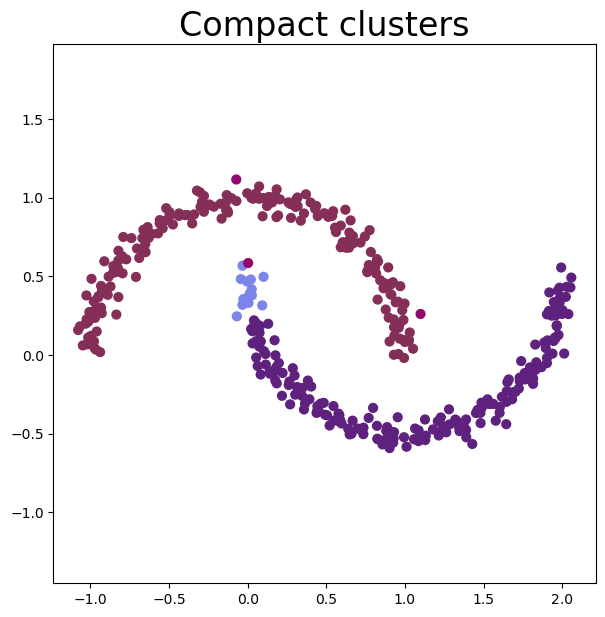

In [66]:
epsilon = 0.1
minpts = 4

from sklearn import cluster
clu = cluster.DBSCAN(eps = epsilon,min_samples=minpts)
y=clu.fit_predict(X)

n_clusters_=len(np.unique(y))
r = lambda: random.randint(0,255)
colors=[]
for i in range(n_clusters_):
    colors.append('#%02X%02X%02X' % (r(),r(),r()))

color = [colors[item] for item in y]

plt.scatter(X[:, 0], X[:, 1], c=color, marker='o',s=40) 
plt.axis('equal')
plt.title('Compact clusters',size=24)
plt.gcf().set_size_inches((7,7))

Let us try this approach clustering a different set of points.

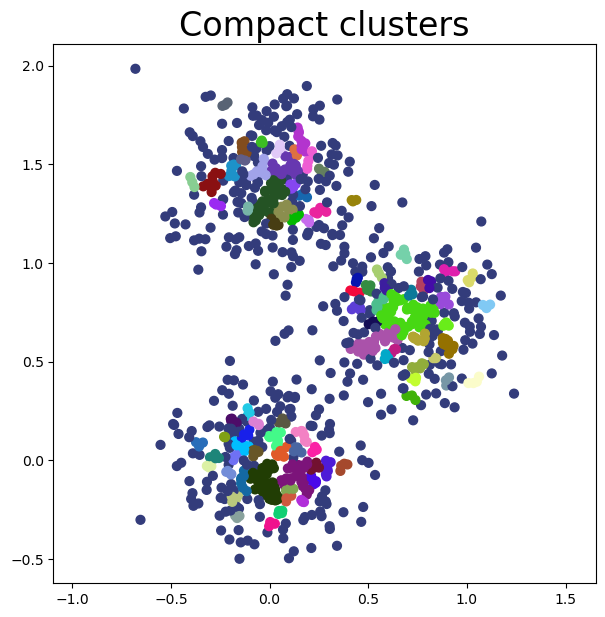

In [67]:
#Create data
centres = [[0.7, 0.7], [0, 0], [0, 1.4]]
X, labels_true = make_blobs(n_samples=1000, centers=centres, cluster_std=0.2)

epsilon = 0.03
minpts = 3

from sklearn import cluster
clu = cluster.DBSCAN(eps = epsilon,min_samples=minpts)
y=clu.fit_predict(X)

n_clusters_=len(np.unique(y))
r = lambda: random.randint(0,255)
colors=[]
for i in range(n_clusters_):
    colors.append('#%02X%02X%02X' % (r(),r(),r()))

color = [colors[item] for item in y]

plt.scatter(X[:, 0], X[:, 1], c=color, marker='o',s=40) 
plt.axis('equal')
plt.title('Compact clusters',size=24)
plt.gcf().set_size_inches((7,7))

<div class = "alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">**EXERCISE:**
Play with the parameters and find a good parameterization for this problem.
</div>

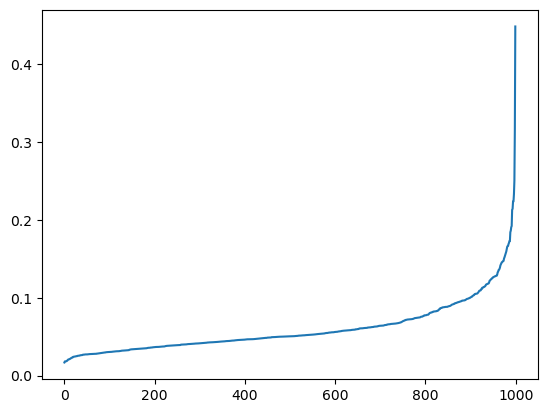

In [68]:
#Create similarity matrix
from scipy.spatial.distance import pdist,squareform
import numpy as np
#Create similarity matrix
d=squareform(pdist(X,'euclidean'))

k = 5
d.sort(axis=0)
plot_data=d[k,:]
plot_data.sort()
plt.plot(np.arange(d.shape[0]),plot_data)



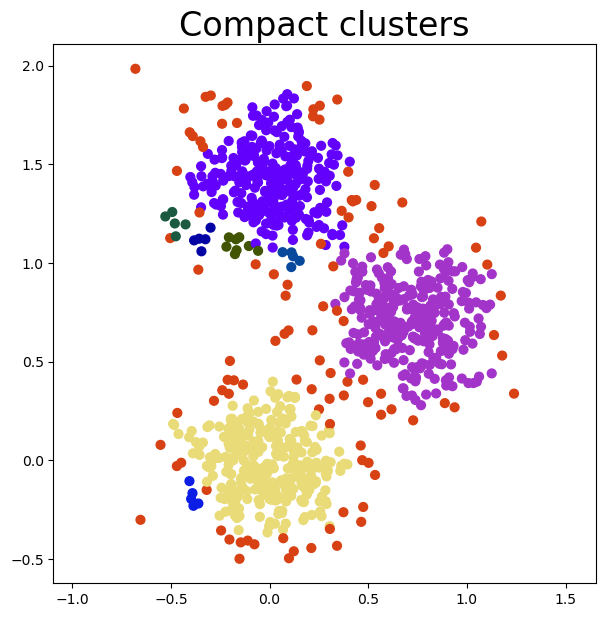

In [69]:
epsilon = 0.07
minpts = 5

from sklearn import cluster
clu = cluster.DBSCAN(eps = epsilon,min_samples=minpts)
y=clu.fit_predict(X)

n_clusters_=len(np.unique(y))
r = lambda: random.randint(0,255)
colors=[]
for i in range(n_clusters_):
    colors.append('#%02X%02X%02X' % (r(),r(),r()))

color = [colors[item] for item in y]

plt.scatter(X[:, 0], X[:, 1], c=color, marker='o',s=40) 
plt.axis('equal')
plt.title('Compact clusters',size=24)
plt.gcf().set_size_inches((7,7))

**DBSCAN PROS:**

+ Handles noise implicitly.
+ Can find clusters with different shapes.

**DBSCAN CONS:**

+ It is difficult to find the correct paramtererization for the technique to work well. Small values of $\epsilon$ tends to oversegment data. 
+ Can not adapt to clusters with different densities.


# Study case: Friday Night Life in New York

<img style = "border-radius:80px;" src="images/FNLf.jpg" width = 700 />

## Stating the problem
Let us apply our knowledge about clustering for discovering patterns in the behavior of people using geo-referenced data. Consider the New York Taxi trip data open data set. Using this data set we would like to find out where in New York people usually hang around on Friday night. Where are there popular areas in New York city? 

In order to do this, we will resort to analyzing where taxi drop off activity occurs at a certain time interval. For example, I would like to check all the drop off points of trips in Friday between 21:00h and 24:00h.

## About the data set

This dataset was obtained through a Freedom of Information Law (FOIL) request from the New York City Taxi & Limousine Commission (NYCT&L) by University of Illinois at Urbana-Champaign (http://publish.illinois.edu/dbwork/open-data/). We consider one year, 2013, of taxi operations in New York City and includes 180M trips. Data is stored in CSV format and organized as follows:

+ **medallion:** a permit to operate a yellow taxi cab in New York City, it is effectively a (randomly assigned) car ID.  See also medallions.
+ **hack license:** a license to drive the vehicle, it is effectively a (randomly assigned) driver ID. See also hack license.
+ **vender id:**  e.g., Verifone Transportation Systems (VTS), or Mobile Knowledge Systems Inc (CMT), implemented as part of the Technology Passenger Enhancements Project.
+ **rate_code:** taximeter rate, see NYCT&L description.
+ **store_and_fwd_flag:** unknown attribute.
+ **pickup_datetime:** start time of the trip, mm-dd-yyyy hh24:mm:ss EDT.
+ **dropoff_datetime:** end time of the trip, mm-dd-yyyy hh24:mm:ss EDT.
+ **passenger_count:** number of passengers on the trip, default value is one.
+ **trip time in secs:** trip time measured by the taximeter in seconds.
+ **trip distance:** trip distance measured by the taximeter in miles.
+ **pickup_longitude** and **pickup_latitude:** GPS coordinates at the start of the trip.
+ **dropoff longitude** and **dropoff latitude:** GPS coordinates at the end of the trip.


## Downloading Data

Note, this is a lot of data to download.  It's also a lot of data to serve.  You might consider grabbing this from a torrent instead.

In [149]:
# !wget https://nyctaxitrips.blob.core.windows.net/data/trip_data_{1,2,3,4,5,6,7,8,9,10,11,12}.csv.zip

For the sake of simplicity and time efficiency we will restrict our analysis to the first data chunck corresponding to a 14M trips during the month of January. Because the analysed data set fits in memory we will use Pandas for processing this chunk. In the case of processing the whole data set out-of-core techniques closely related to database technologies should be used. 

In [150]:
%reset -f 
import pandas as pd
import numpy as np
import datetime

%time df = pd.read_csv('data/trip_data_1.csv', parse_dates=['pickup_datetime','dropoff_datetime'])

df.head(1)

KeyboardInterrupt: 

Let us simply visualize the density of drop off of the first elements of the dataset.

In [ ]:
columns = ['dropoff_latitude','dropoff_longitude']
tmp= df[columns]
dtmp = tmp.ix[0:1000].values
dtmp = [list(x) for x in dtmp if x.any(0.0)]

In [ ]:
import gmaps
gmaps.heatmap(dtmp)

With a proper network connection we would obtain the following:
<img src = "images/gmap_dense.png" width=700/>
    

Manhattan is the drop off goal of most of the analysed taxis. We can see several spots in Brooklyn and Queens and a clear hot spot at La Guardia airport.

Let us slice and filter the dataframe according to the query we want to perform. In this case we would like to check the week day of a given date. We will use the **.weekday()** method of Timestamp or datetime data types. It returns an integer number 0 for Monday up to 6 for Sunday. We also have to check the dropoff hour. We may use the hour method. We are building a function that will check the condition for each row item. In order to apply this function for each column ite we will use the command **.map** as follows,

In [89]:
def get_weekday(date):
    dat = date.weekday()
    hor = date.hour
    return dat>3 and dat<5 and hor>21

%time nl=df[df['dropoff_datetime'].map(get_weekday)]

KeyboardInterrupt: 

From this selection we will project the data over the dropoff coordinates.

In [ ]:
columns = ['dropoff_latitude','dropoff_longitude']
fri = nl[columns]
fri.head()

Let us chech the number of data points after the selection.

In [ ]:
len(fri)

If we check the values of the latitude and longitude we realize that there are non referenced data. Zero values in longitude or latitude. 


In [ ]:
#Remove zeros
sel = (np.abs(fri['dropoff_longitude'])>1e-3) & (np.abs(fri['dropoff_latitude'])>1e-3)
friclean = fri[sel]

Let us apply the clustering techniques we just described. Let us start by trying to model our goal in terms of parameters. DBSCAN is a nice technique for geo-referenced clustering because the $\epsilon$ parameter has a physical meaning. In this case it refers to the drop off area we consider is forming a cluster. 

In NYC:

   + 1 degree lat ~= 69.1703234284 miles
   + 1 degree lon ~= 52.3831781372 miles


<img src="images/NY_square_size.png" width = 700\>

NY squares measure 100m x 300m, (0.0621371 miles x 0.186411 miles). If we use $\epsilon$ = 0.07 miles radius/ 70 miles/degree ~= 1e-3. We may arbitrarily set the value of **MinPts** ot 500 in this case.


In [ ]:
from sklearn import cluster
data_fri = friclean.values
clu = cluster.DBSCAN(eps = 1e-3,min_samples=500)
%time y=clu.fit_predict(data_fri)
print "Fitting complete."

In [ ]:
%matplotlib inline
import pygmaps 
import numpy as np

#Create colour palette
n_clusters_ = len(np.unique(y)) 
import random
color = []
r = lambda: random.randint(0,255)
for i in xrange(n_clusters_):
    color.append('#%02X%02X%02X' % (r(),r(),r()))

mymap = pygmaps.maps(data_fri[0][0],data_fri[0][1], 12)
for i in xrange(len(y)):
    mymap.addpoint(data_fri[i][0],data_fri[i][1], color[y[i]]) 
    
mymap.draw('gmap_full.html') 

Open the HTML file just created. The map may last a little to load because of the 250K markers used on the map. Thus, I have just a screenshoot of the result. 

<img src = "images/gmap_full.png" width = 900/>

Well, this does not seem much informative. But let us zoom a little on Manhattan.
<img src="images/gmap_full_zoom.png" width=900/>

This looks a little more interesting. There seems to be some clusters but everything is so cluttered. Recall that in DBSCAN we have data belonging to CORE, BOUNDARY, and OUTLIERS. It turns out that purple markers are outliers. So let us try to visualize only CORE samples.

In [ ]:
#Draw only CORE samples
#Create colour palette
n_clusters_ = len(np.unique(y)) 
import random
color = []
r = lambda: random.randint(0,255)
for i in xrange(n_clusters_):
    color.append('#%02X%02X%02X' % (r(),r(),r()))


clu.components_
mymap = pygmaps.maps(data_fri[0][0],data_fri[0][1], 12)
y_core=y[clu.core_sample_indices_]
for i in xrange(len(y_core)):
    mymap.addpoint(clu.components_[i][0],clu.components_[i][1], color[y_core[i]]) 
    
mymap.draw('gmap_core.html') 

Let us see what it looks like.
<img src = "images/gmap_core.png" width = 900>

This is much more interesting. We see some areas that seem to be drop-off points. Let us zoom in a little more. 
<img src = "images/gmap_core_zoom1.png" width = 900>

And more. 
<img src = "images/gmap_core_zoom2_1.png" width = 500>
This is Manhanttan Lower East Side.
<img src = "images/gmap_core_zoom2_3.png" width = 500>
And Meatpack.
Observe that the clusters are not circular. What would have happened if we used k-means instead of DBSCAN?

Using a simple query on Tripadvisor forums:
    <img src = "images/NY_bar.png" width = 500/>

## 5. Spectral clustering

Our last method in this notebook will be spectral clustering. In order to illustrate it we will add some spice to our problem. But before let us check on the theoretical and algorithmic basis of the technique.

This is another technique, that follows the notion of **connectivity** instead of **compactness**. Let us recall the standard example showing the difference between both:

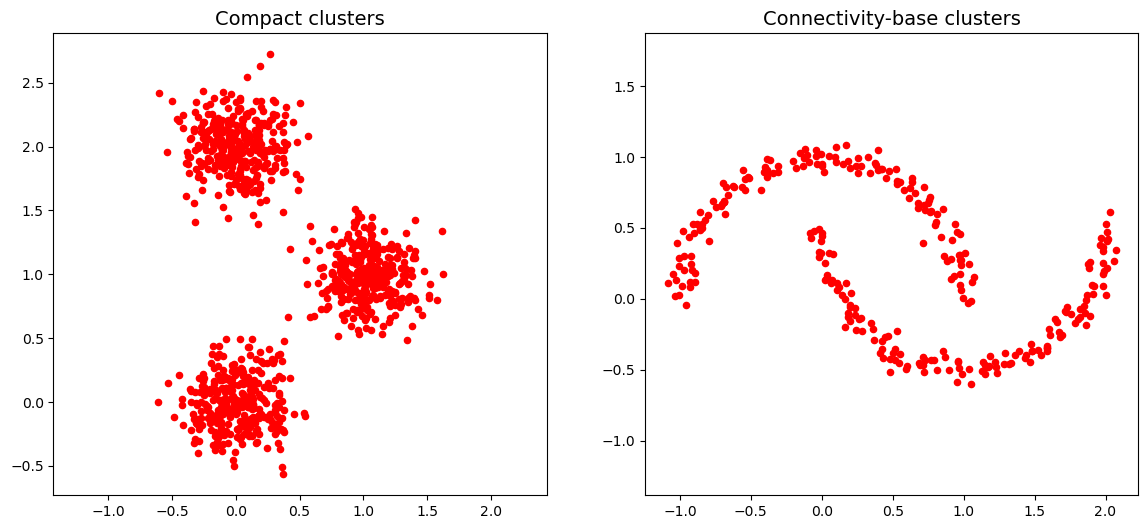

In [70]:
from sklearn.datasets import make_moons, make_blobs
import matplotlib.pyplot as plt

centres = [[1, 1], [0, 0], [0, 2]]
X, labels_true = make_blobs(n_samples=1000, centers=centres, cluster_std=[0.2,0.2,0.2])
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c='r', marker='o',s=20) 
plt.axis('equal')
plt.title('Compact clusters',size=14)

[X, y] = make_moons(n_samples=300, noise=.05)
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c='r', marker='o',s=20) 
plt.axis('equal')
plt.title('Connectivity-base clusters', size=14)
fig = plt.gcf()
fig.set_size_inches((14,6))

**Spectral clustering** refers to a family of methods that use spectral techniques. Specifically, these techniques are related to the eigen-decomposition of an affinity or similarity matrix and attempt to solve the problem of clustering according to connectivity.

Understanding spectral clustering requires realizing the following:

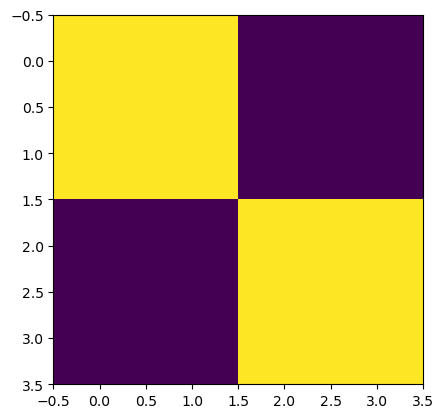

In [71]:
#Suppose an ideal similarity matrix
import numpy as np

S = np.array([[1,1,0,0],[1, 1, 0, 0],[0,0,1,1],[0,0,1,1]])
plt.imshow(S,interpolation='nearest')

This matrix shows how data is similar to each other. We can clearly see two clusters. Let us now check the eigenvectors of this matrix.

In [72]:
# Perform eigenvalue deccomposition and show the eigen vectors in descending order
from scipy.linalg import eig
[eig_vals, eig_vecs] = eig(S)
sorted_inds = np.argsort(-eig_vals.real, axis=0)
print (eig_vecs[:,sorted_inds])

[[ 0.70710678  0.         -0.70710678  0.        ]
 [ 0.70710678  0.          0.70710678  0.        ]
 [ 0.          0.70710678  0.         -0.70710678]
 [ 0.          0.70710678  0.          0.70710678]]


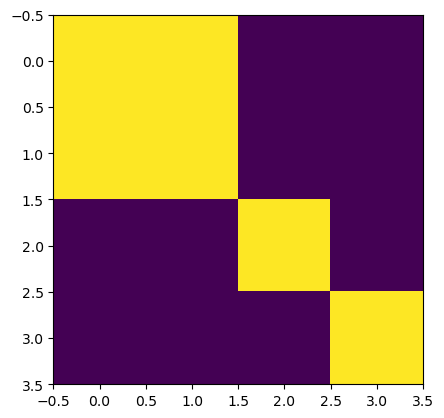

In [73]:
#Suppose an ideal similarity matrix
import numpy as np

S = np.array([[1,1,0,0],[1, 1, 0, 0],[0,0,1,0],[0,0,0,1]])
plt.imshow(S,interpolation='nearest')

In [74]:
# Perform eigenvalue deccomposition and show the eigen vectors in descending order
from scipy.linalg import eig
[eig_vals, eig_vecs] = eig(S)
sorted_inds = np.argsort(-eig_vals.real, axis=0)
print (eig_vecs[:,sorted_inds])

[[ 0.70710678  0.          0.         -0.70710678]
 [ 0.70710678  0.          0.          0.70710678]
 [ 0.          1.          0.          0.        ]
 [ 0.          0.          1.          0.        ]]


Observe than in the ideal case the first eigen vector perfectly characterizes the first cluster and the second teh second cluster. This observation can be generalized to k-eigenvectors for $K$ clusters. Let us corrupt the matrix a little and see what happens.

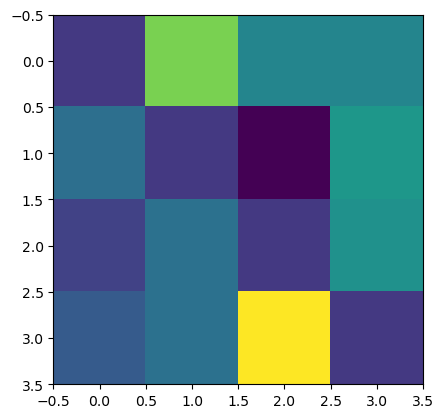

In [75]:
noise=2
S = np.array([[1,1,0,0],[1, 1, 0, 0],[0,0,1,1],[0,0,1,1]])
S2 = S+noise*np.random.rand(S.shape[0],S.shape[1])*(1-np.eye(4))
plt.imshow(S2,interpolation='nearest')

In [76]:
# Perform eigenvalue deccomposition and show the eigen vectors in descending order
from scipy.linalg import eig
[eig_vals, eig_vecs] = eig(S2)
sorted_inds = np.argsort(-eig_vals.real, axis=0)
print (np.real(eig_vecs[:,sorted_inds]))

[[ 0.55830555  0.6394678  -0.64832239 -0.64832239]
 [ 0.42913895  0.39991701  0.59986685  0.59986685]
 [ 0.45188668 -0.32517257  0.04873112  0.04873112]
 [ 0.54766149 -0.5704473  -0.14161921 -0.14161921]]


The result is not so nice but let us look at the first two eigen vectors. The first eigenvector is nearly constant. This is expected in a fully connected graph. But the second eigenvector characterizes the partition pretty well. 

<div class="alert alert-success"> **EXERCISE:** Increase the value of the random noise and check the two first eigenvectors. Can we partition the two clusters based on that information? (Recall that the maximum value in a similarity matrix is 1)
</div>

Let us apply k-means to the two moons toy problem.

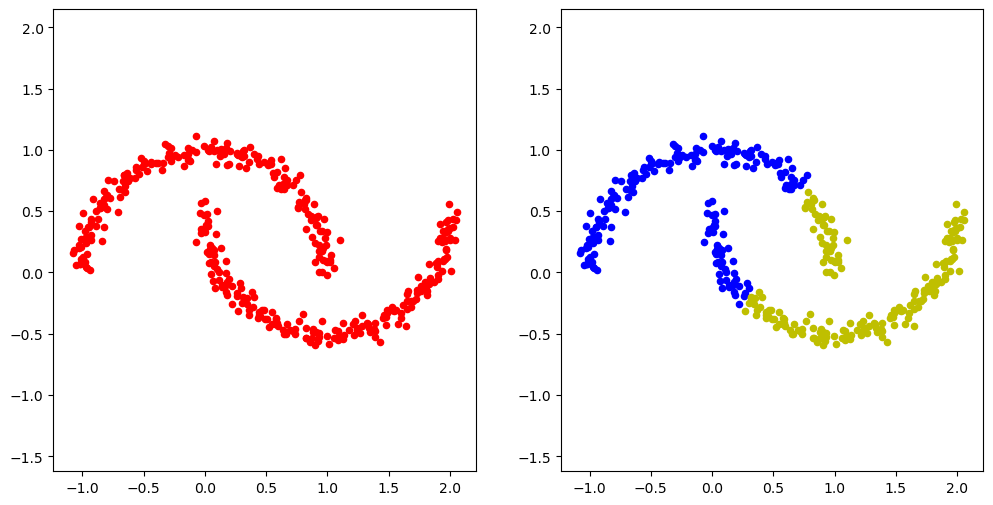

In [77]:
%reset -f
%matplotlib inline
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn import cluster

# Connectivity based clustering dataset
[X, y] = make_moons(n_samples=400, noise=.05, random_state=0)
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c='r', marker='o',s=20) 
plt.axis('equal')

# Cluster using k-means
clf = cluster.KMeans(n_clusters=2,init='k-means++')
clf.fit(X)
y_pred=clf.predict(X)
plt.subplot(1,2,2)
plt.scatter(X[y_pred==0, 0], X[y_pred==0, 1], c='b', marker='o',s=20) 
plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1], c='y', marker='o',s=20) 
plt.axis('equal')
fig=plt.gcf()
fig.set_size_inches((12,6))

And now let us apply our knowledge on spectral theory.

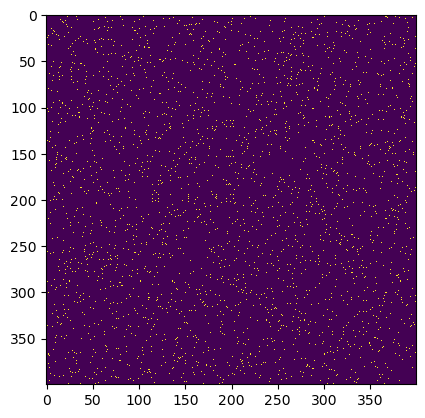

In [78]:
#Create similarity matrix
from scipy.spatial.distance import pdist,squareform
import numpy as np
#Create similarity matrix
d=squareform(pdist(X,'sqeuclidean'))
sigma=0.5
S = np.exp(-d/sigma)

# Build graph laplacian from a K-NN graph
n_neighbors = 6
A= np.zeros(S.shape)
for i in range(A.shape[0]):
    s = np.sort(S[i])
    A[i][S[i]>=s[-n_neighbors-1]]=1
A = np.fmax(A,A.T)
A=A-np.eye(A.shape[0])
plt.imshow(A,interpolation='nearest')
D = np.diag(np.sum(A,axis=0))
L = D - A


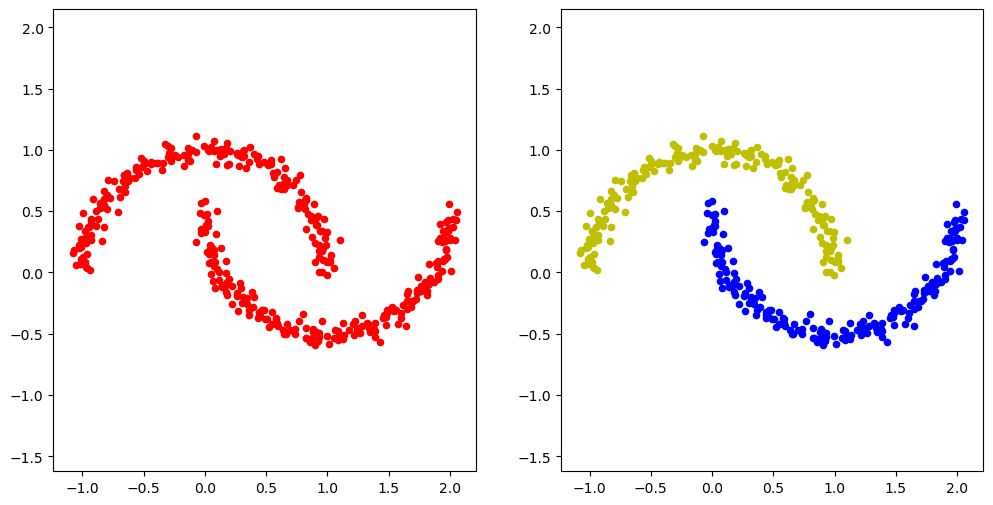

In [79]:
# Perform eigenvalue deccomposition and show the eigen vectors in ASCENDING order
# Observe that we are eigendecomposing "L \approx -S" so the eigenvalues will be minus 
# the intuitive ones. Thus we will look at the second smallest eigen vector to perform the
# clustering.
from scipy.linalg import eig
[eig_vals, eig_vecs] = eig(L)
sorted_inds = np.argsort(eig_vals.real, axis=0)

y_pred = eig_vecs[:,sorted_inds[1]]>0

ind = np.argsort(y_pred)
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c='r', marker='o',s=20) 
plt.axis('equal')

plt.subplot(1,2,2)
plt.scatter(X[y_pred==0, 0], X[y_pred==0, 1], c='b', marker='o',s=20) 
plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1], c='y', marker='o',s=20) 
plt.axis('equal')
fig=plt.gcf()
fig.set_size_inches((12,6))

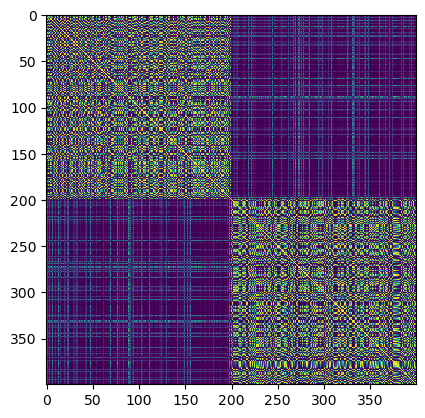

In [80]:
plt.imshow(S[ind].T[ind],interpolation='nearest')

**Some observations about the code:**

+ The code is nearly identical to the toy problem case except that we use a different but closely related matrix than the similarity matrix. 
+ The clustering is performed on the **graph Laplacian matrix** ($L = D - A$, where $D$ is the **degree matrix** (a diagonal matrix where each element $d_{i,j}$ counts the number of edges the node has) and the role of the similarity matrix is now given by the **affinity matrix** ($A$).
+ Because the Laplacian is related to $-A$, instead of computing the second larger eigen vector we have to check on the second smaller eigen vector.

### Setting the number of clusters

Let us look at the eigen values in ascending order.

<BarContainer object of 10 artists>

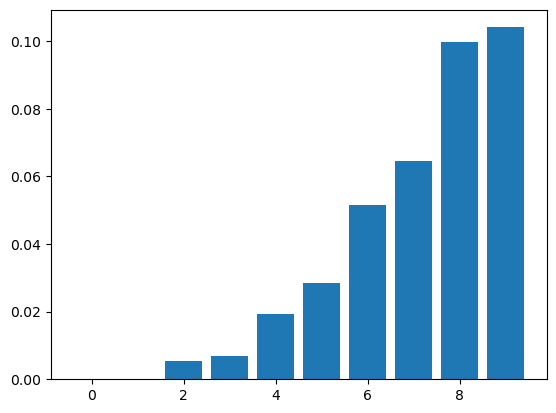

In [81]:
#Setting the clusters
plt.bar(range(10), eig_vals.real[sorted_inds[0:10]])

Observe that there are two which are close to zero. In particular, a good heuristic for checking how many clusters there are is precisely counitng the number of nearly zero eigenvalues. In the two moons problem this value is precisely two clusters.

### Handling multiple clusters
We have seen that checking the second smallest eigen vector we can find a partition of the data in two clusters. What if we have more than to clusters? Actually, for $K$ clusters we have to check for the smallest $K$ eigen vectors. The usual way of handling this situation is to use a K-means on the $K$ smallest eigen vectors.

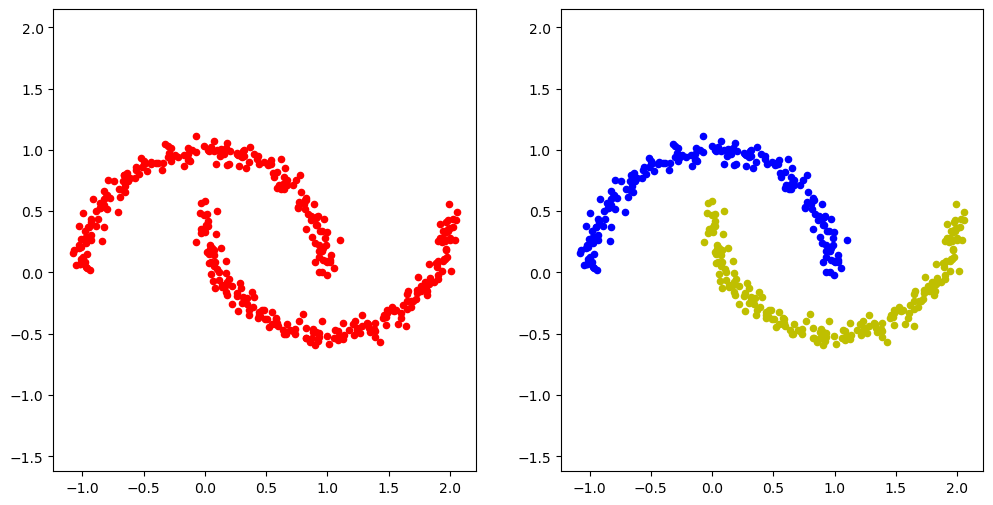

In [82]:
# Perform eigenvalue deccomposition and show the eigen vectors in ASCENDING order
# Observe that we are eigendecomposing "L \approx -S" so the eigenvalues will be minus 
# the intuitive ones. Thus we will look at the second smallest eigen vector to perform the
# clustering.
from scipy.linalg import eig
[eig_vals, eig_vecs] = eig(L)
sorted_inds = np.argsort(eig_vals.real, axis=0)

#y_pred = eig_vecs[:,sorted_inds[1]]>0 is replace by the following lines: 
K=2
clf = cluster.KMeans(n_clusters=K,init='k-means++')
clf.fit(eig_vecs[:,sorted_inds[0:K]])
y_pred=clf.predict(eig_vecs[:,sorted_inds[0:K]])

ind = np.argsort(y_pred)
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c='r', marker='o',s=20) 
plt.axis('equal')

plt.subplot(1,2,2)
plt.scatter(X[y_pred==0, 0], X[y_pred==0, 1], c='b', marker='o',s=20) 
plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1], c='y', marker='o',s=20) 
plt.axis('equal')
fig=plt.gcf()
fig.set_size_inches((12,6))

The former code is now general for any number of clusters. 

### An informal intuition about why this work
In many areas in engineering, finance, ... we usually find problems in which our model is a linear system of equations, i.e. $Ax = b$. The matrix $A$ transforms vector $x$ into some desired right hand side $b$. We may be interested in the application of the model to new data (finding $b$) or in finding the values that satisfy several condition via the inverse problem $x = A^{-1} b$. However, sometimes we are interested in understanding the transformation itself. 

Eigen decomposition of a matrix allows us to better undertand the transformation. The application of a matrix to a vector geometrically rotates and scales the vector. Eigen decomposition characterizes the set of vectors that are only scaled by the transformation. This means that if a vector is close to one of the eigen vectors it will be approximately scaled by the eigen value. Because the eigen vectors are orthogonal, they form a basis of  the same space. This means that for instance projecting on this basis the elements of the new vector will be just scaled by their eigen value.

Why is this interesting? Consider for instance the covariance matrix. Checking the eigen vectors we may know the direction that yields the maximum variance of the data i.e. the eigen vector with the maximum eigen value. In our case considering the similarity matrix we may find a direction that makes the values as similar as posible. 

## Application to Eurostat data.

Let us add the labor force indicators of Eurostats.

In [83]:
%reset -f
#Read and check the dataset downloaded from the EuroStat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
labor=pd.read_csv('lfsi_act_a_1_Data.csv',na_values=':',)
labor.Value.astype(str)
labor.head()


,TIME,GEO,SEX,INDIC_EM,Value
0,2004,European Union (28 countries),Total,Total population,486 299.4
1,2004,European Union (28 countries),Total,Population (15 to 64 years),326 881.9
2,2004,European Union (28 countries),Total,Active population,230 158.9
3,2004,European Union (28 countries),Total,Growth of active population,0.9
4,2004,European Union (28 countries),Total,Activity rate (15 to 64 years),69.3


In [84]:
def strip_space(x):
    if type(x) == str:
        return float(x.replace(' ',''))

labor['Value'] = labor['Value'].map(strip_space)

labor.head()

,TIME,GEO,SEX,INDIC_EM,Value
0,2004,European Union (28 countries),Total,Total population,486299.4
1,2004,European Union (28 countries),Total,Population (15 to 64 years),326881.9
2,2004,European Union (28 countries),Total,Active population,230158.9
3,2004,European Union (28 countries),Total,Growth of active population,0.9
4,2004,European Union (28 countries),Total,Activity rate (15 to 64 years),69.3


In [85]:
#Pivot table in order to get a nice feature vector representation with dual indexing by TIME, GEO and SEX 
pivedu=pd.pivot_table(labor, values='Value', index=['TIME', 'GEO', 'SEX'], columns=['INDIC_EM'])
pivedu.head()

INDIC_EM              Active population  Activity rate (15 to 24 years)  \
TIME GEO     SEX                                                          
2004 Austria Females             1778.8                            53.3   
             Males               2159.5                            61.7   
             Total               3938.4                            57.4   
     Belgium Females             1973.0                            32.8   
             Males               2545.2                            37.7   

INDIC_EM              Activity rate (15 to 64 years)  \
TIME GEO     SEX                                       
2004 Austria Females                            64.2   
             Males                              78.5   
             Total                              71.3   
     Belgium Females                            58.2   
             Males                              73.4   

INDIC_EM              Activity rate (20 to 64 years)  \
TIME GEO     SEX                                       
2004 Austria Females                            67.0   
             Males                              81.4   
             Total                              74.2   
     Belgium Females                            63.1   
             Males                              79.6   

INDIC_EM              Activity rate (25 to 54 years)  \
TIME GEO     SEX                                       
2004 Austria Females                            79.6   
             Males                              92.9   
             Total                              86.3   
     Belgium Females                            74.8   
             Males                              91.8   

INDIC_EM              Activity rate (55 to 64 years)  \
TIME GEO     SEX                                       
2004 Austria Females                            19.9   
             Males                              40.6   
             Total                              29.9   
     Belgium Females                            22.1   
             Males                              40.4   

INDIC_EM              Growth of active population  \
TIME GEO     SEX                                    
2004 Austria Females                          0.4   
             Males                           -1.4   
             Total                           -0.6   
     Belgium Females                          2.5   
             Males                            1.4   

INDIC_EM              Population (15 to 64 years)  Total population  \
TIME GEO     SEX                                                      
2004 Austria Females                       2756.6            4146.7   
             Males                         2728.0            3898.3   
             Total                         5484.7            8045.0   
     Belgium Females                       3375.0            5309.9   
             Males                         3443.4            5085.7   

INDIC_EM              Youth unemployment ratio 15-24  
TIME GEO     SEX                                      
2004 Austria Females                             5.4  
             Males                               5.7  
             Total                               5.6  
     Belgium Females                             7.3  
             Males                               7.6

In [86]:
#Extract 2010 set of values
labor2010=pivedu.loc[2010]
labor2010.head()

INDIC_EM         Active population  Activity rate (15 to 24 years)  \
GEO     SEX                                                          
Austria Females             1982.5                            54.1   
        Males               2302.1                            63.6   
        Total               4284.3                            58.8   
Belgium Females             2219.9                            29.8   
        Males               2674.5                            35.2   

INDIC_EM         Activity rate (15 to 64 years)  \
GEO     SEX                                       
Austria Females                            69.3   
        Males                              80.9   
        Total                              75.1   
Belgium Females                            61.8   
        Males                              73.4   

INDIC_EM         Activity rate (20 to 64 years)  \
GEO     SEX                                       
Austria Females                            72.4   
        Males                              83.9   
        Total                              78.1   
Belgium Females                            67.1   
        Males                              79.8   

INDIC_EM         Activity rate (25 to 54 years)  \
GEO     SEX                                       
Austria Females                            82.8   
        Males                              92.5   
        Total                              87.7   
Belgium Females                            80.4   
        Males                              92.2   

INDIC_EM         Activity rate (55 to 64 years)  Growth of active population  \
GEO     SEX                                                                    
Austria Females                            34.2                         -0.1   
        Males                              53.0                          0.2   
        Total                              43.4                          0.1   
Belgium Females                            30.9                          2.2   
        Males                              47.6                          1.5   

INDIC_EM         Population (15 to 64 years)  Total population  \
GEO     SEX                                                      
Austria Females                       2817.5            4235.4   
        Males                         2788.7            4024.0   
        Total                         5606.1            8259.4   
Belgium Females                       3569.8            5552.5   
        Males                         3607.0            5339.7   

INDIC_EM         Youth unemployment ratio 15-24  
GEO     SEX                                      
Austria Females                             4.7  
        Males                               5.7  
        Total                               5.2  
Belgium Females                             6.7  
        Males                               7.9

In [87]:
labor2010=labor2010.drop(['Males','Females'],level=1)
labor2010.reset_index(level=1, drop=True,inplace=True)
labor2010.columns=range(13,23)
labor2010.head()

,13,14,15,16,17,18,19,20,21,22
GEO,,,,,,,,,,
Austria,4284.3,58.8,75.1,78.1,87.7,43.4,0.1,5606.1,8259.4,5.2
Belgium,4894.5,32.5,67.7,73.5,86.3,39.2,1.8,7176.8,10892.2,7.3
Bulgaria,3404.3,28.9,66.5,72.6,83.4,47.9,-2.5,5046.2,7563.7,6.7
Croatia,1746.9,34.2,61.4,66.2,79.4,40.5,-0.8,2757.4,4225.1,11.2
Cyprus,421.7,40.6,73.6,80.0,86.9,59.1,4.1,555.1,796.3,6.7


In [88]:
#Drop columns 13,20, and 21 corresponding to absolute active population. We don't want to cluster data according to the countries total amoutn of population
labor2010 = labor2010.drop([13,20,21],1)

/var/folders/sz/_0qpnyfj2mdfnd1kvwj9py200000gn/T/ipykernel_39062/1807133829.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  labor2010 = labor2010.drop([13,20,21],1)


In [89]:
labor2010 = labor2010.rename(index={'Euro area (13 countries)': 'EU13',
                                'Euro area (15 countries)': 'EU15',
                                'Euro area (17 countries)': 'EU17',
                                'Euro area (18 countries)': 'EU18',
                                'European Union (15 countries)': 'EU15',
            'European Union (25 countries)': 'EU25',
            'European Union (27 countries)': 'EU27',
            'European Union (28 countries)': 'EU28',
            'Former Yugoslav Republic of Macedonia, the': 'Macedonia',
            'Germany (until 1990 former territory of the FRG)': 'Germany'
            })

In [90]:
import pickle
fname = open('edu2010.pkl','rb')
data = pickle.load(fname)
[edu2010,wrk_countries_names,y_pred]=data
#Join the tables using inner join (some elements will be removed if not sharing indices)
edlab=edu2010.join(labor2010, how='inner')
edlab.columns=range(19)
edlab.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
GEO,,,,,,,,,,,,,,,,,,,
Austria,0.52,5.25,9.98,0.64,1.22,0.61,1.01,2.64,1.63,5.89,5.90,11.20,58.8,75.1,78.1,87.7,43.4,0.1,5.2
Belgium,0.34,6.25,11.90,0.32,0.61,0.78,1.54,2.79,1.46,6.57,6.44,12.51,32.5,67.7,73.5,86.3,39.2,1.8,7.3
Bulgaria,0.63,3.35,8.96,0.74,1.99,0.92,0.80,1.76,0.61,4.10,4.18,10.95,28.9,66.5,72.6,83.4,47.9,-2.5,6.7
Croatia,0.26,4.24,NaN,0.03,NaN,0.65,1.87,0.97,0.78,4.27,4.42,NaN,34.2,61.4,66.2,79.4,40.5,-0.8,11.2
Cyprus,1.61,6.73,14.59,1.19,2.57,0.40,2.26,3.14,2.12,7.92,8.18,17.16,40.6,73.6,80.0,86.9,59.1,4.1,6.7


In [91]:
#Replace missing values by their 
edlab = edlab.fillna(np.mean(edlab,axis=0))
#Save for the next notebook
import pickle
fname = open('edulab2010.pkl','wb')
data = pickle.dump([edlab,edlab.index.tolist()],fname)
fname.close()

In [96]:
#Standarize data
X = edlab.values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn import cluster
clf = cluster.SpectralClustering(gamma=1.0, n_clusters = 4,n_neighbors=5, eigen_solver='arpack')
y_pred_join = clf.fit_predict(X)


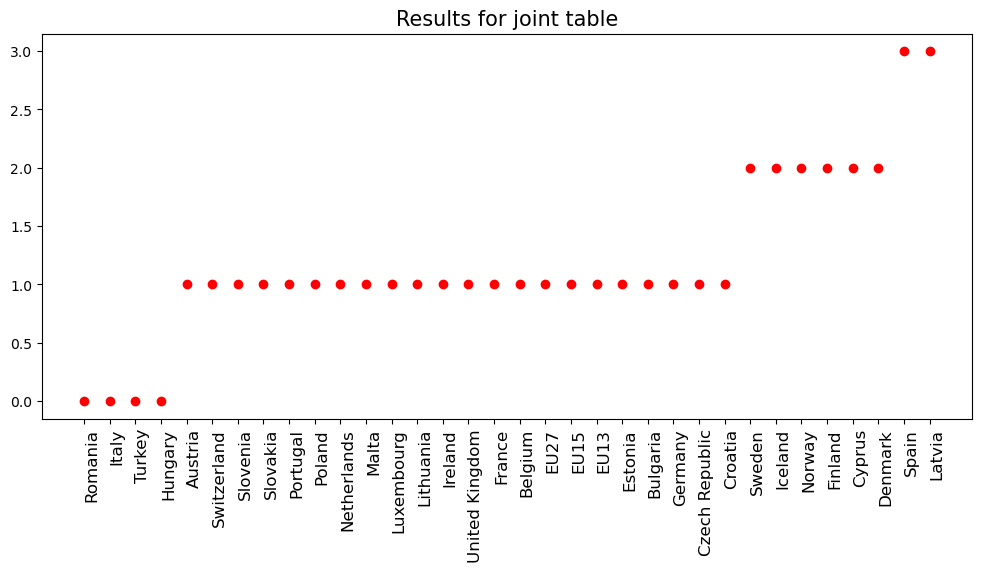

In [97]:
%matplotlib inline
idx=y_pred_join.argsort()
plt.plot(np.arange(len(idx)),y_pred_join[idx],'ro')
countries= edlab.index.tolist()
plt.xticks(np.arange(len(countries)),[countries[i] for i in idx],rotation=90,horizontalalignment='left',fontsize=12)
plt.title('Results for joint table',size=15)
fig = plt.gcf()
fig.set_size_inches((12,5))

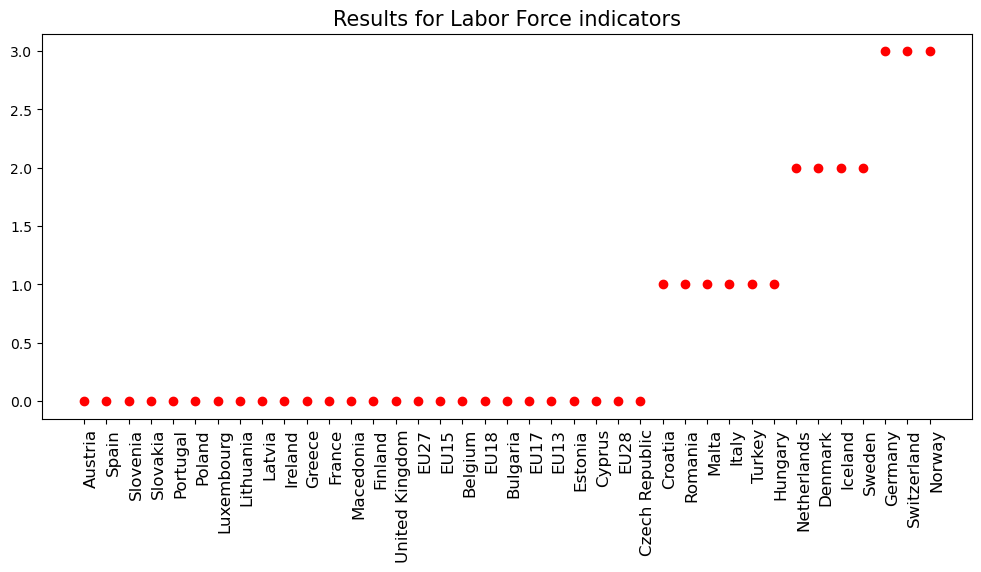

In [100]:
#Replace missing values by their 
labor2010 = labor2010.fillna(np.mean(edlab,axis=0))
#Standarize data
X = labor2010.values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn import cluster
clf = cluster.SpectralClustering(gamma = 1.0, n_clusters = 4,n_neighbors=5, eigen_solver='arpack')
y_pred_labor = clf.fit_predict(X)

idx=y_pred_labor.argsort()
plt.plot(np.arange(len(idx)),y_pred_labor[idx],'ro')
countries= labor2010.index.tolist()
plt.xticks(np.arange(len(countries)),[countries[i] for i in idx],rotation=90,horizontalalignment='left',fontsize=12)
plt.title('Results for Labor Force indicators',size=15)
fig = plt.gcf()
fig.set_size_inches((12,5))

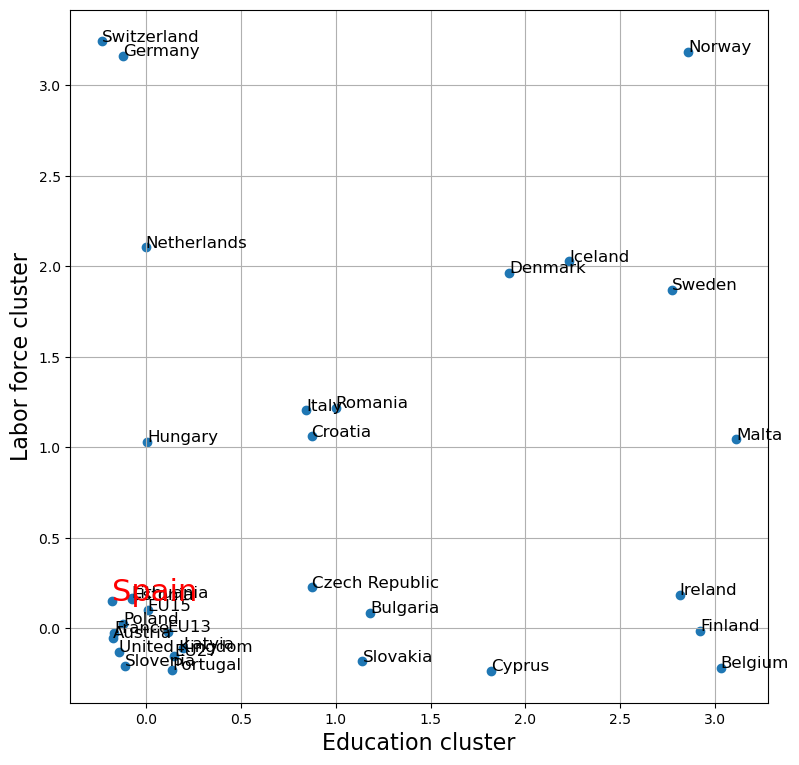

In [101]:
#Create a join plot of Labor and Education

names = [item for item in countries if item in wrk_countries_names]
yp = np.zeros((len(names),))
ypl = np.zeros((len(names),))
j=0
for name in names:
    yp[j] =  [y_pred[i] for i in range(len(y_pred)) if wrk_countries_names[i]==name][0]
    ypl[j] =  [y_pred_labor[i] for i in range(len(y_pred_labor)) if countries[i]==name][0]
    j=j+1

rnd_val=0.5
posx=yp+rnd_val*(np.random.rand(len(names))-0.5)
posy=ypl+rnd_val*(np.random.rand(len(names))-0.5)
plt.scatter(posx,posy)
plt.xlabel('Education cluster',size=16)
plt.ylabel('Labor force cluster',size=16)
ax = plt.gca()
for i, txt in enumerate(names):
    if txt == "Spain":
        ax.annotate(txt, (posx[i],posy[i]),size=22,color="red")
    else:
        ax.annotate(txt, (posx[i],posy[i]),size=12)
plt.grid()
fig = plt.gcf()
fig.set_size_inches((9,9))


A final note on our problem. Observe that with spectral clustering we can not recover prototypes because we can not properly define a common parent, a center or an average profile.

## 2.4 Summary table

In the following adapted table from sklearn documentation we may check several methods for clustering, their corresponding parameters, scalability, their use and the notions of similarity they use as well as the input data format needed.

<table border="1">
<colgroup>
<col width="12.5%" />
<col width="12.5%" />
<col width="20%" />
<col width="20%" />
<col width="20%" />
<col width="15%" />
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Method name</th>
<th class="head">Parameters</th>
<th class="head">Scalability</th>
<th class="head">Use</th>
<th class="head">Metric</th>
<th class="head">Input</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td><em>K-Means</em></td>
<td>number of clusters</td>
<td>Very large <cite>n_samples</cite>, medium <cite>n_clusters</cite></td>
<td>General-purpose, even cluster size, flat geometry, not too many clusters</td>
<td>Distances between points</td>
<td>Data samples</td>
</tr>
<tr class="row-odd"><td><em>Affinity propagation</em></td>
<td>damping, sample preference</td>
<td>Not scalable with n_samples</td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
<td>Affinity/distance matrix</td>
</tr>
<tr class="row-even"><td><em>Mean-shift</em></td>
<td>bandwidth</td>
<td>Not scalable with n_samples</td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Distances between points</td>
<td>Data samples</td>
</tr>
<tr class="row-odd"><td><em>Spectral clustering</em></td>
<td>number of clusters</td>
<td>Medium <cite>n_samples</cite>, small <cite>n_clusters</cite></td>
<td>Few clusters, even cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
<td>Affinity/distance matrix</td>
</tr>
<tr class="row-even"><td><em>Hierarchical clustering</em></td>
<td>number of clusters/ threshold</td>
<td>Large <cite>n_samples</cite> and <cite>n_clusters</cite></td>
<td>Many clusters, possibly connectivity constraints</td>
<td>Distances between points</td>
<td>Affinity/distance matrix</td>
</tr>
<tr class="row-odd"><td><em>DBSCAN</em></a></td>
<td>neighborhood size (eps)</td>
<td>Very large <cite>n_samples</cite>, medium <cite>n_clusters</cite></td>
<td>Non-flat geometry, uneven cluster sizes</td>
<td>Distances between nearest points</td>
<td>Data samples/ Affinity/distance matrix</td>
</tr>
</tbody>
</table>


<div class="alert alert-success"> **A last exercise:** Take any other clustering algorithm, e.g. affinity progagation or DBSCAN and run the clustering on our data problem. Are the results consistent with the previous analysis?
</div>